# <font color= 'orange'>UNSUPERVISED LEARNING PROJECT </font>

In [151]:
# importing All required pakages

# numerical ,stats and visualizing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import os
import os.path
import warnings
warnings.filterwarnings("ignore")

#data preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# cluster models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

# cluster metrics
from sklearn.metrics import silhouette_samples, silhouette_score

#linear models 
from sklearn.linear_model import LinearRegression

# <font color= 'green'>PART 1 </font>

<b>•DOMAIN:</b> Automobile 

<b>•CONTEXT: </b>The  data  concerns  city-cycle  fuel  consumption  in  miles  per  gallon,  to  be  predicted  in  terms  of  3  multivalued  discrete  and  5 continuous attributes 

<b>•DATA DESCRIPTION:</b> The data concerns city-cycle fuel consumption in miles per gallon 

<b>•Attribute Information: </b><br>
1.mpg: continuous<br>
2.cylinders: multi-valued discrete<br>
3.displacement: continuous<br>
4.horsepower: continuous<br>
5.weight: continuous<br>
6.acceleration: continuous<br>
7.model year: multi-valued discrete<br>
8.origin: multi-valued discrete<br>
9.car name: string (unique for each instance) <br>

<b>•PROJECT OBJECTIVE:</b> Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 

In [152]:
# importing dataset for part 1
part1_data = pd.read_json('D:/Datasets/Unsupervised_learning_project_pdp/Part1 - Car-Attributes.json')
part1_carnames = pd.read_csv('D:/Datasets/Unsupervised_learning_project_pdp/Part1 - Car name.csv')

In [153]:
part1_data.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [154]:
#lets change the columns of data
part1_data.columns = ['Mpg','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_year','Origin']

part1_data.head()

Mpg  Cylinders  Displacement Horsepower  Weight  Acceleration  Model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   Origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [155]:
#checking types of datatypes of columns using df.info() method
part1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model_year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


We can see horsepower is object type where values in it are float type .we need to change it to float type

In [156]:
#checking unique values in int type columns expt weight

for i in ['Cylinders','Model_year','Origin']:
    print('{col} := {values}'.format(col = i,values = part1_data[i].unique()))

Cylinders := [8 4 6 3 5]
Model_year := [70 71 72 73 74 75 76 77 78 79 80 81 82]
Origin := [1 3 2]


In [157]:
#shape of part1_data
part1_data.shape

(398, 8)

In [158]:
#Merging part1_data with car_names
part1_final_data = pd.concat([part1_data,part1_carnames],axis = 1)
part1_final_data

Mpg  Cylinders  Displacement Horsepower  Weight  Acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     Model_year  Origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [159]:
# Converting json to csv and saving it in hdd
file_exists_hdd = os.path.exists('D:/Datasets/Unsupervised_learning_project_pdp/Part1 - Car-Attributes.csv')
if (not file_exists_hdd):
    part1_final_data.to_csv('Part1 - Car-Attributes.csv')

In [160]:
# data cleaning

#checking for null values
part1_final_data.isna().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
car_name        0
dtype: int64

In [161]:
# checking for string formats other than numbers using unique function taking out carnames
for i in part1_final_data.columns[:-1]:
    print('{col} := {values}'.format(col = i,values = part1_data[i].unique()))
    print('\n \n')

Mpg := [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

 

Cylinders := [8 4 6 3 5]

 

Displacement := [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
 

<b><font color = 'red'>NOTE:</font></b> In Horse power we can see there is a '?' charater so we replace that using median 

In [162]:
# we replace '?' character with median value and change it to float type
part1_final_data['Horsepower'] = pd.to_numeric(part1_final_data['Horsepower'],errors='coerce')
part1_final_data['Horsepower'].fillna(part1_final_data['Horsepower'].median(),inplace = True)

In [163]:
part1_final_data['Horsepower'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

# <font color= 'BLUE'> Analysis</font>

## <font color= '#a86b32'>  Stats Analysis</font>

<font color = 'red'><b>NOTE:</b></font> Both the One-Way ANOVA and the Independent Samples t Test can compare the means for two groups. However, only the One-Way ANOVA can compare the means across three or more groups

In [164]:
# 1. one-way anova for cylinders
# H0 : All the means are Equal
# Ha : All the means are not equal
def cylinders_one_way_anova(data):
    f3 = (data['Cylinders'] == 3)
    f4 = (data['Cylinders'] == 4)
    f5 = (data['Cylinders'] == 5)
    f6 = (data['Cylinders'] == 6)
    f8 = (data['Cylinders'] == 8)

    stats_df = pd.DataFrame({},columns =['Result','Outcome'])
    for c in ['Mpg','Displacement','Horsepower','Weight','Acceleration']:
        sample3 = data.loc[f3,c]
        sample4 = data.loc[f4,c]
        sample5 = data.loc[f5,c]
        sample6 = data.loc[f6,c]
        sample8 = data.loc[f8,c]
        anova_stats,p_val = stats.f_oneway(sample3,sample4,sample5,sample6,sample8)
        if (p_val < 0.05):
            df = pd.DataFrame({'Result':['means are not equal'],
                            'Outcome':['reject null hypothesis']})
                
            stats_df = pd.concat([stats_df,df],axis = 0)
            
        else:
            df = pd.DataFrame({'Result':['mean equal'],
                              'Outcome':['fail to reject null hypothesis']})
            
            stats_df = pd.concat([stats_df,df],axis = 0)
            
    stats_df.index = ['Mpg','Displacement','Horsepower','Weight','Acceleration']
    
    return stats_df

In [165]:
cylinders_one_way_anova(part1_final_data)

Result                 Outcome
Mpg           means are not equal  reject null hypothesis
Displacement  means are not equal  reject null hypothesis
Horsepower    means are not equal  reject null hypothesis
Weight        means are not equal  reject null hypothesis
Acceleration  means are not equal  reject null hypothesis

In [166]:
# Because there are no categorical variables so we cannot perform chi2 test

## <font color= '#a86b32'>  Data visualization</font>

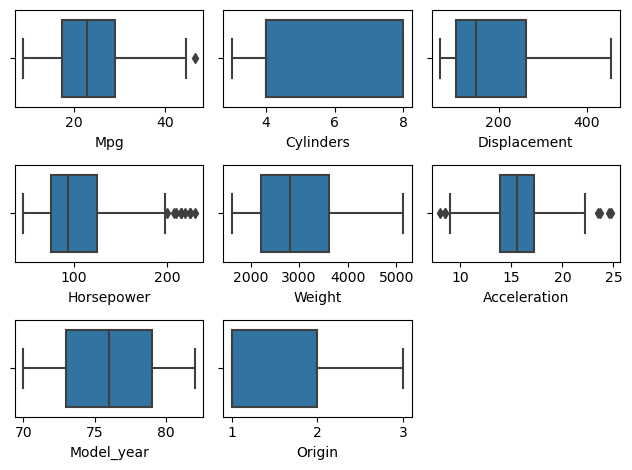

In [167]:
for i,col in enumerate(part1_final_data.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col,data = part1_final_data)
plt.tight_layout()
plt.show()
    

<font color = 'red'><b>NOTE:</b></font> We can see We have outliers in some of columns

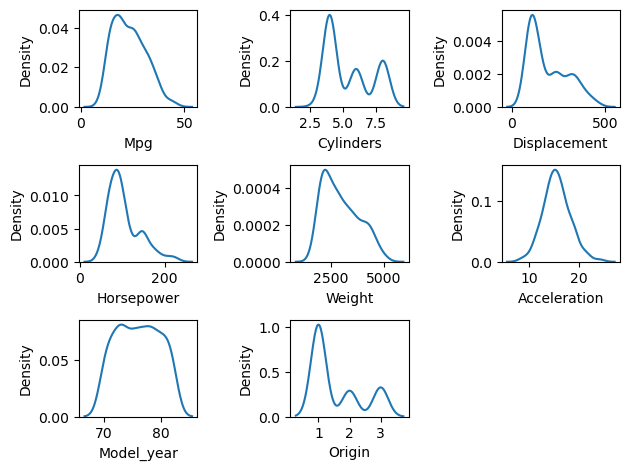

In [168]:
for i,col in enumerate(part1_final_data.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x = col,data = part1_final_data)
plt.tight_layout()
plt.show()

<font color = 'red'><b>NOTE:</b></font>We can see distribution is noy symentric except acceleration

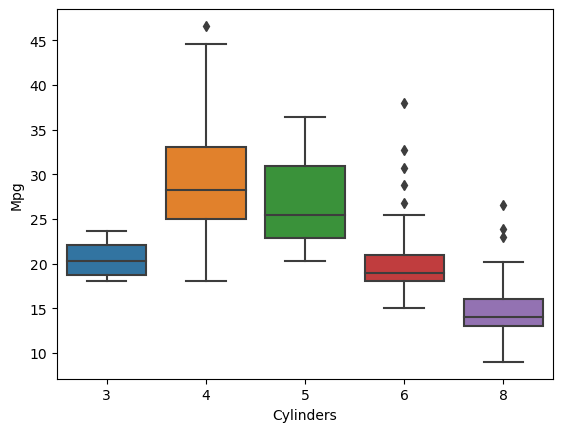

In [169]:
# Bi model
# ['Mpg','Displacement','Horsepower','Weight','Acceleration']:
sns.boxplot(x =  'Cylinders',y  = 'Mpg',data = part1_final_data)
plt.show()

<font color = 'red'><b>NOTE:</b></font> From this graph we can say that cars with cylinder 4,5 have good mpg

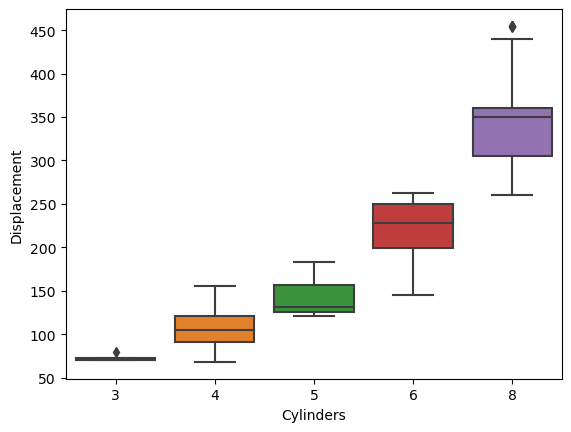

In [170]:
sns.boxplot(x =  'Cylinders',y  = 'Displacement',data = part1_final_data)
plt.show()

<font color = 'red'><b>NOTE:</b></font> From this graph we can say that lower the cyclinder count  lower the displacement 

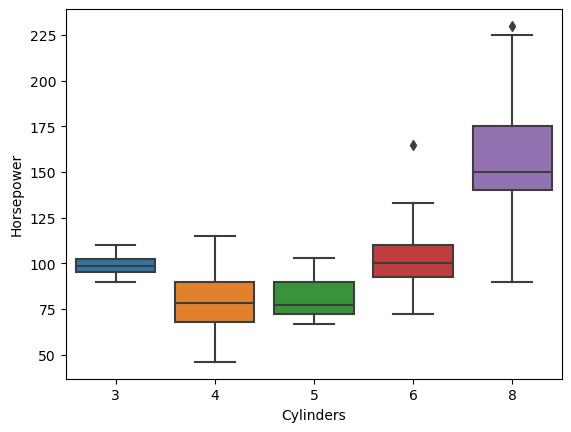

In [171]:
sns.boxplot(x =  'Cylinders',y  = 'Horsepower',data = part1_final_data)
plt.show()

<font color = 'red'><b>NOTE:</b></font> From this graph we can say that cars with higher cylinder count has higher horsepower 

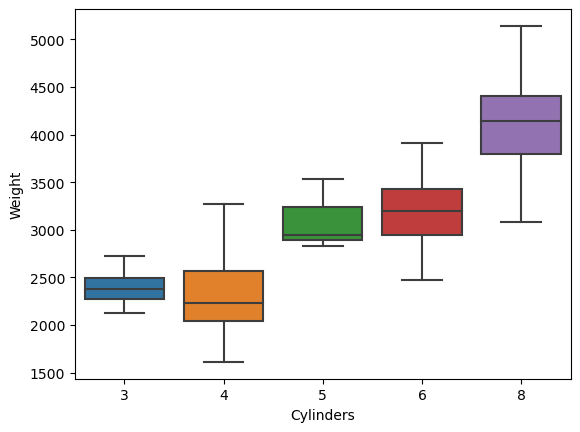

In [172]:
sns.boxplot(x =  'Cylinders',y  = 'Weight',data = part1_final_data)
plt.show()

<font color = 'red'><b>NOTE:</b></font> From this graph we can say that cars with higher cylinder count has higher the weight

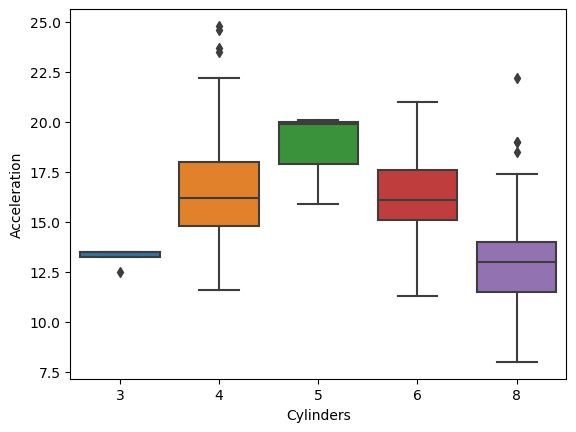

In [173]:
sns.boxplot(x =  'Cylinders',y  = 'Acceleration',data = part1_final_data)
plt.show()

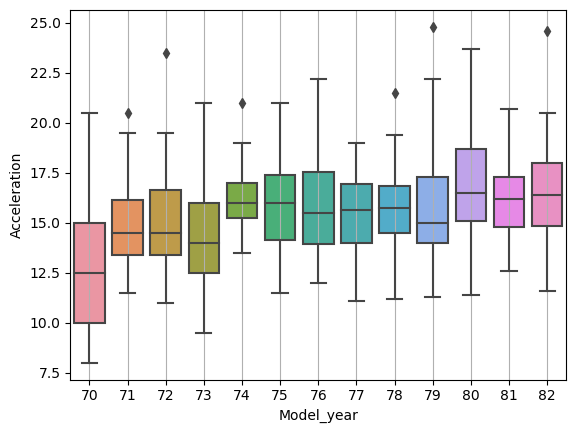

In [174]:
sns.boxplot(x =  'Model_year',y  = 'Acceleration',data = part1_final_data)
plt.grid(axis = 'x')
plt.show()

<font color = 'red'><b>NOTE:</b></font> From this graph we can say that cars that count of cylinder and acceraltion follows uniformly i.e at median or mean of cylinder count  acceration is higher than extremes

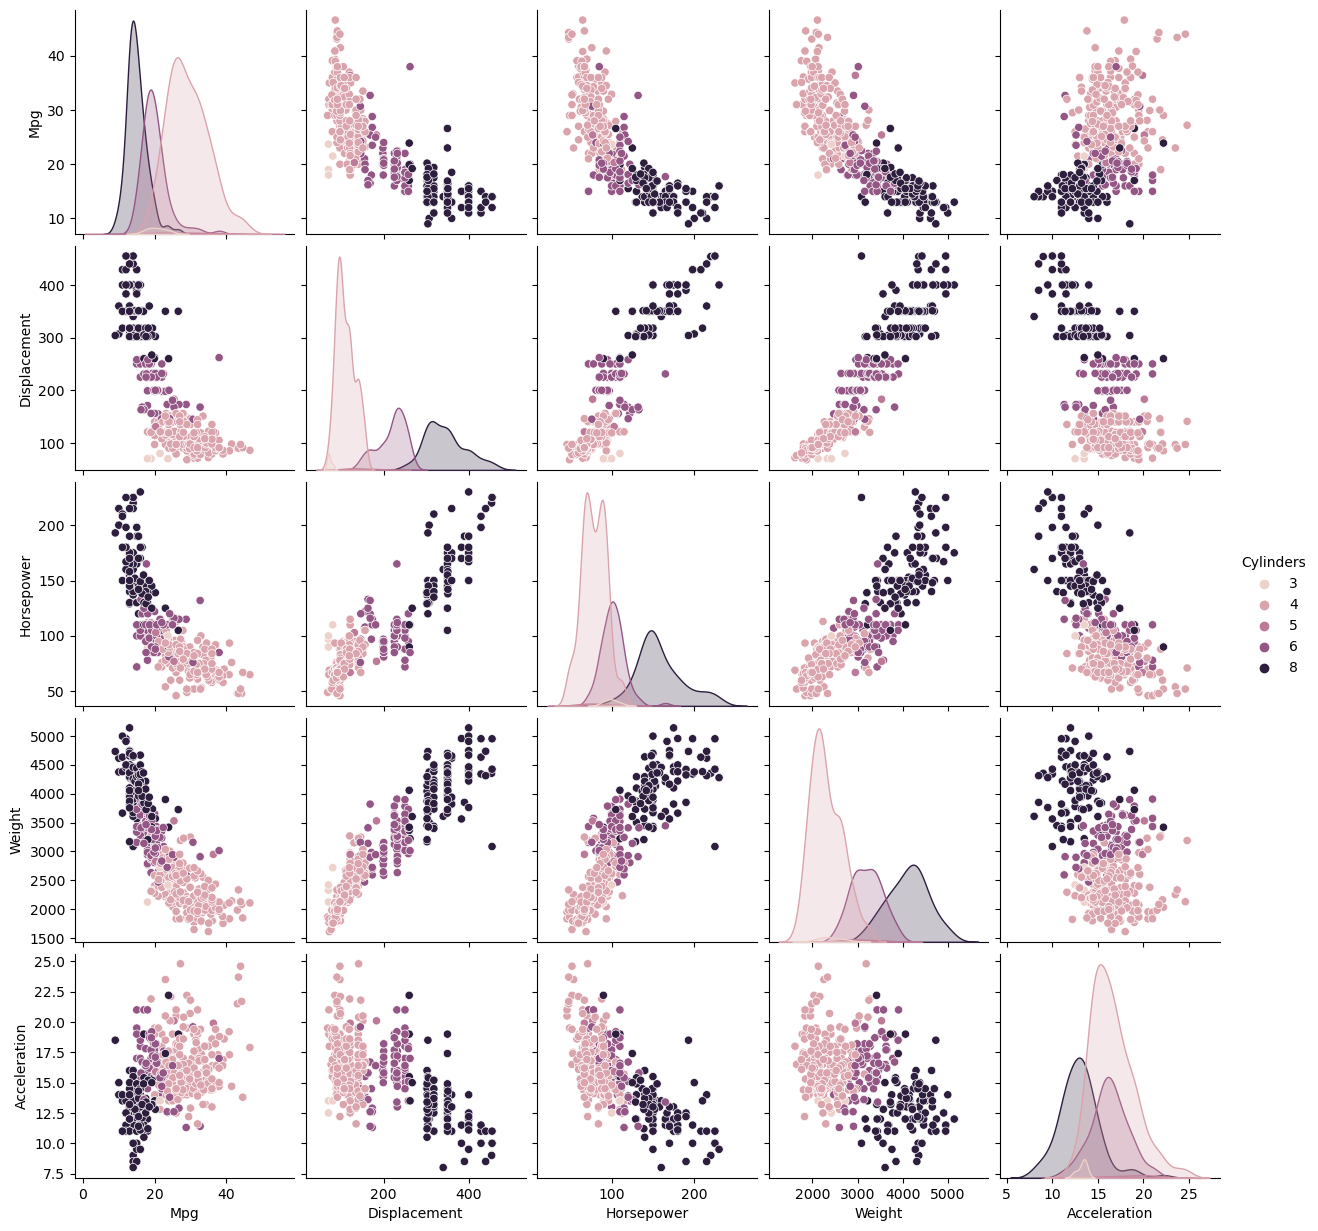

In [175]:
#multi model
col = ['Mpg','Displacement','Horsepower','Weight','Acceleration']
sns.pairplot(data = part1_final_data,x_vars = col,y_vars = col,hue = 'Cylinders' )
plt.show()

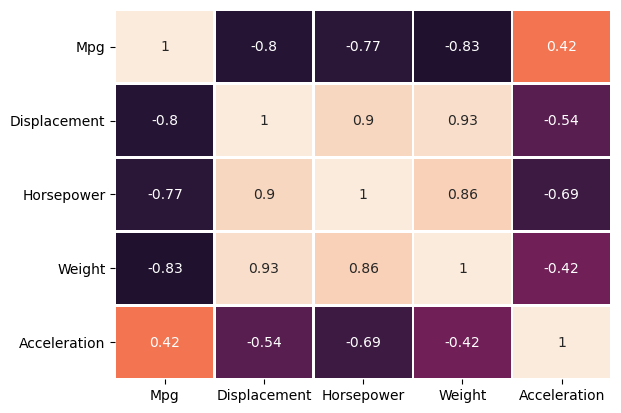

In [176]:
# Checking for linearity between part1_final_data 
corr = part1_final_data[col].corr()
sns.heatmap(data = corr,cbar = False,annot = True,vmin = -1,vmax = 1,linewidths = 1,linecolor = 'white',)
plt.show()

<font color = 'red'><b>NOTE:</b></font> From above heatmap we can say that :<br>
1. Displacement is 90% positively correlated with HorsePower<br>
2. Displacemet is 93% positively correlated with weight<br>
3. Horsepower is 86% positively correlated with weight<br>
4. Mpg is 80% negitively correlated with Displacement <br>
5. Mpg is 83% negitively correlated with weight<br>

<b> HERE I CONSIDERED VARIABLES THAT ABOVE 80% CORRELATED </b>

In [177]:
# data Preproccesing
# 1.considering all except names as import and performing kmeans and hier-clustering
#1.1 scaling every columns
scaler = MinMaxScaler()
scaled_all = scaler.fit_transform(part1_final_data.iloc[:,:-1])
part1_all_scaled = pd.DataFrame(scaled_all,columns = part1_final_data.columns[:-1])
part1_all_scaled

Mpg  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
0    0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1    0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2    0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3    0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4    0.212766        1.0      0.604651    0.510870  0.520556      0.148810   
..        ...        ...           ...         ...       ...           ...   
393  0.478723        0.2      0.186047    0.217391  0.333711      0.452381   
394  0.930851        0.2      0.074935    0.032609  0.146583      0.988095   
395  0.611702        0.2      0.173127    0.206522  0.193365      0.214286   
396  0.505319        0.2      0.134367    0.179348  0.286929      0.630952   
397  0.585106        0.2      0.131783    0.195652  0.313864      0.678571   

     Model_year  Origin  
0           0.0     0.0  
1           0.0     0.0  
2           0.0     0.0  
3           0.0     0.0  
4           0.0     0.0  
..          ...     ...  
393         1.0     0.0  
394         1.0     0.5  
395         1.0     0.0  
396         1.0     0.0  
397         1.0     0.0  

[398 rows x 8 columns]

In [178]:
# 2 . only 5 columns  ['Mpg','Displacement','Horsepower','Weight','Acceleration']
scaler = MinMaxScaler()
scaled_5 = scaler.fit_transform(part1_final_data[['Mpg','Displacement','Horsepower','Weight','Acceleration']])
part1_5_scaled = pd.DataFrame(scaled_5,columns = ['Mpg','Displacement','Horsepower','Weight','Acceleration'])
part1_5_scaled

Mpg  Displacement  Horsepower    Weight  Acceleration
0    0.239362      0.617571    0.456522  0.536150      0.238095
1    0.159574      0.728682    0.646739  0.589736      0.208333
2    0.239362      0.645995    0.565217  0.516870      0.178571
3    0.186170      0.609819    0.565217  0.516019      0.238095
4    0.212766      0.604651    0.510870  0.520556      0.148810
..        ...           ...         ...       ...           ...
393  0.478723      0.186047    0.217391  0.333711      0.452381
394  0.930851      0.074935    0.032609  0.146583      0.988095
395  0.611702      0.173127    0.206522  0.193365      0.214286
396  0.505319      0.134367    0.179348  0.286929      0.630952
397  0.585106      0.131783    0.195652  0.313864      0.678571

[398 rows x 5 columns]

In [179]:
#Finding optimal no. of clusters
def optimal_k(df):
    clusters=range(1,10)
    meanDistortions=[]

    for k in clusters:
        model=KMeans(n_clusters=k)
        model.fit(df)
        prediction=model.predict(df)
        meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])


    plt.plot(clusters, meanDistortions, 'bo-')#'bo-'
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with the Elbow Method')
    plt.show()

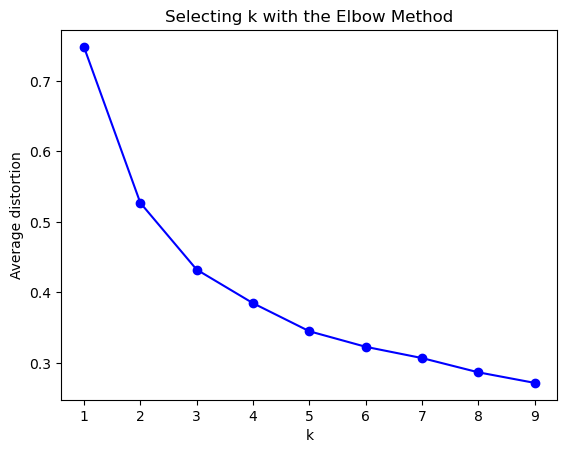

In [180]:
optimal_k(part1_all_scaled)

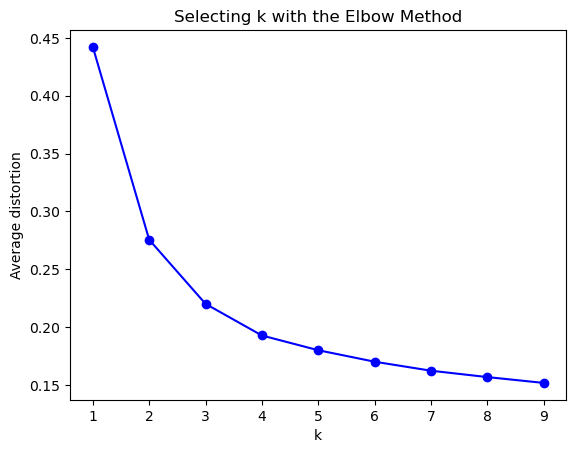

In [181]:
optimal_k(part1_5_scaled)

 <font color = 'red'><b>NOTE:</b></font>There is elbow for two points 2 and 3 we will do cluster with k = 2 and 3 select best or good

In [182]:
#model Building kmeans clustering
#for k in range 2 - 9
for k in range(2,10):
    final_model3=KMeans(k)
    final_model3.fit(part1_all_scaled)
    prediction=final_model3.predict(part1_all_scaled)
    print('silhouette_score for k =',k,' is',silhouette_score(part1_all_scaled,final_model3.labels_))

silhouette_score for k = 2  is 0.43141030940679453
silhouette_score for k = 3  is 0.39028818584020925
silhouette_score for k = 4  is 0.3658033308913122
silhouette_score for k = 5  is 0.3697995054444094
silhouette_score for k = 6  is 0.3657333925754318
silhouette_score for k = 7  is 0.3462797235714058
silhouette_score for k = 8  is 0.3506284417932783
silhouette_score for k = 9  is 0.35736760993312355


In [183]:
final_model=KMeans(3)
final_model.fit(part1_all_scaled)
prediction=final_model.predict(part1_all_scaled)
part1_all_scaled_kmeans_df = part1_all_scaled
part1_final_data_kmeans_df = part1_final_data

part1_all_scaled_kmeans_df['Labels'] = prediction
part1_final_data['Labels'] = prediction
part1_all_scaled_kmeans_df

Mpg  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
0    0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1    0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2    0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3    0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4    0.212766        1.0      0.604651    0.510870  0.520556      0.148810   
..        ...        ...           ...         ...       ...           ...   
393  0.478723        0.2      0.186047    0.217391  0.333711      0.452381   
394  0.930851        0.2      0.074935    0.032609  0.146583      0.988095   
395  0.611702        0.2      0.173127    0.206522  0.193365      0.214286   
396  0.505319        0.2      0.134367    0.179348  0.286929      0.630952   
397  0.585106        0.2      0.131783    0.195652  0.313864      0.678571   

     Model_year  Origin  Labels  
0           0.0     0.0       0  
1           0.0     0.0       0  
2           0.0     0.0       0  
3           0.0     0.0       0  
4           0.0     0.0       0  
..          ...     ...     ...  
393         1.0     0.0       2  
394         1.0     0.5       1  
395         1.0     0.0       2  
396         1.0     0.0       2  
397         1.0     0.0       2  

[398 rows x 9 columns]

<font color = 'red'><b>NOTE:</b></font> We will select 3 clusters 

In [184]:
# model building Hierarchial clustering
# AgglomerativeClustering 
#no of clusters = 3 [from  kmeans]
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(part1_all_scaled)

part1_all_scaled_agglo_df = part1_all_scaled
part1_final_data_agglo_df = part1_final_data

part1_all_scaled_agglo_df['Labels'] = model.labels_
part1_final_data_agglo_df['Labels'] = prediction
part1_all_scaled_agglo_df

Mpg  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
0    0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1    0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2    0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3    0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4    0.212766        1.0      0.604651    0.510870  0.520556      0.148810   
..        ...        ...           ...         ...       ...           ...   
393  0.478723        0.2      0.186047    0.217391  0.333711      0.452381   
394  0.930851        0.2      0.074935    0.032609  0.146583      0.988095   
395  0.611702        0.2      0.173127    0.206522  0.193365      0.214286   
396  0.505319        0.2      0.134367    0.179348  0.286929      0.630952   
397  0.585106        0.2      0.131783    0.195652  0.313864      0.678571   

     Model_year  Origin  Labels  
0           0.0     0.0       1  
1           0.0     0.0       1  
2           0.0     0.0       1  
3           0.0     0.0       1  
4           0.0     0.0       1  
..          ...     ...     ...  
393         1.0     0.0       2  
394         1.0     0.5       0  
395         1.0     0.0       2  
396         1.0     0.0       2  
397         1.0     0.0       2  

[398 rows x 9 columns]

In [185]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(part1_all_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(part1_all_scaled))

c

0.9531401904951771

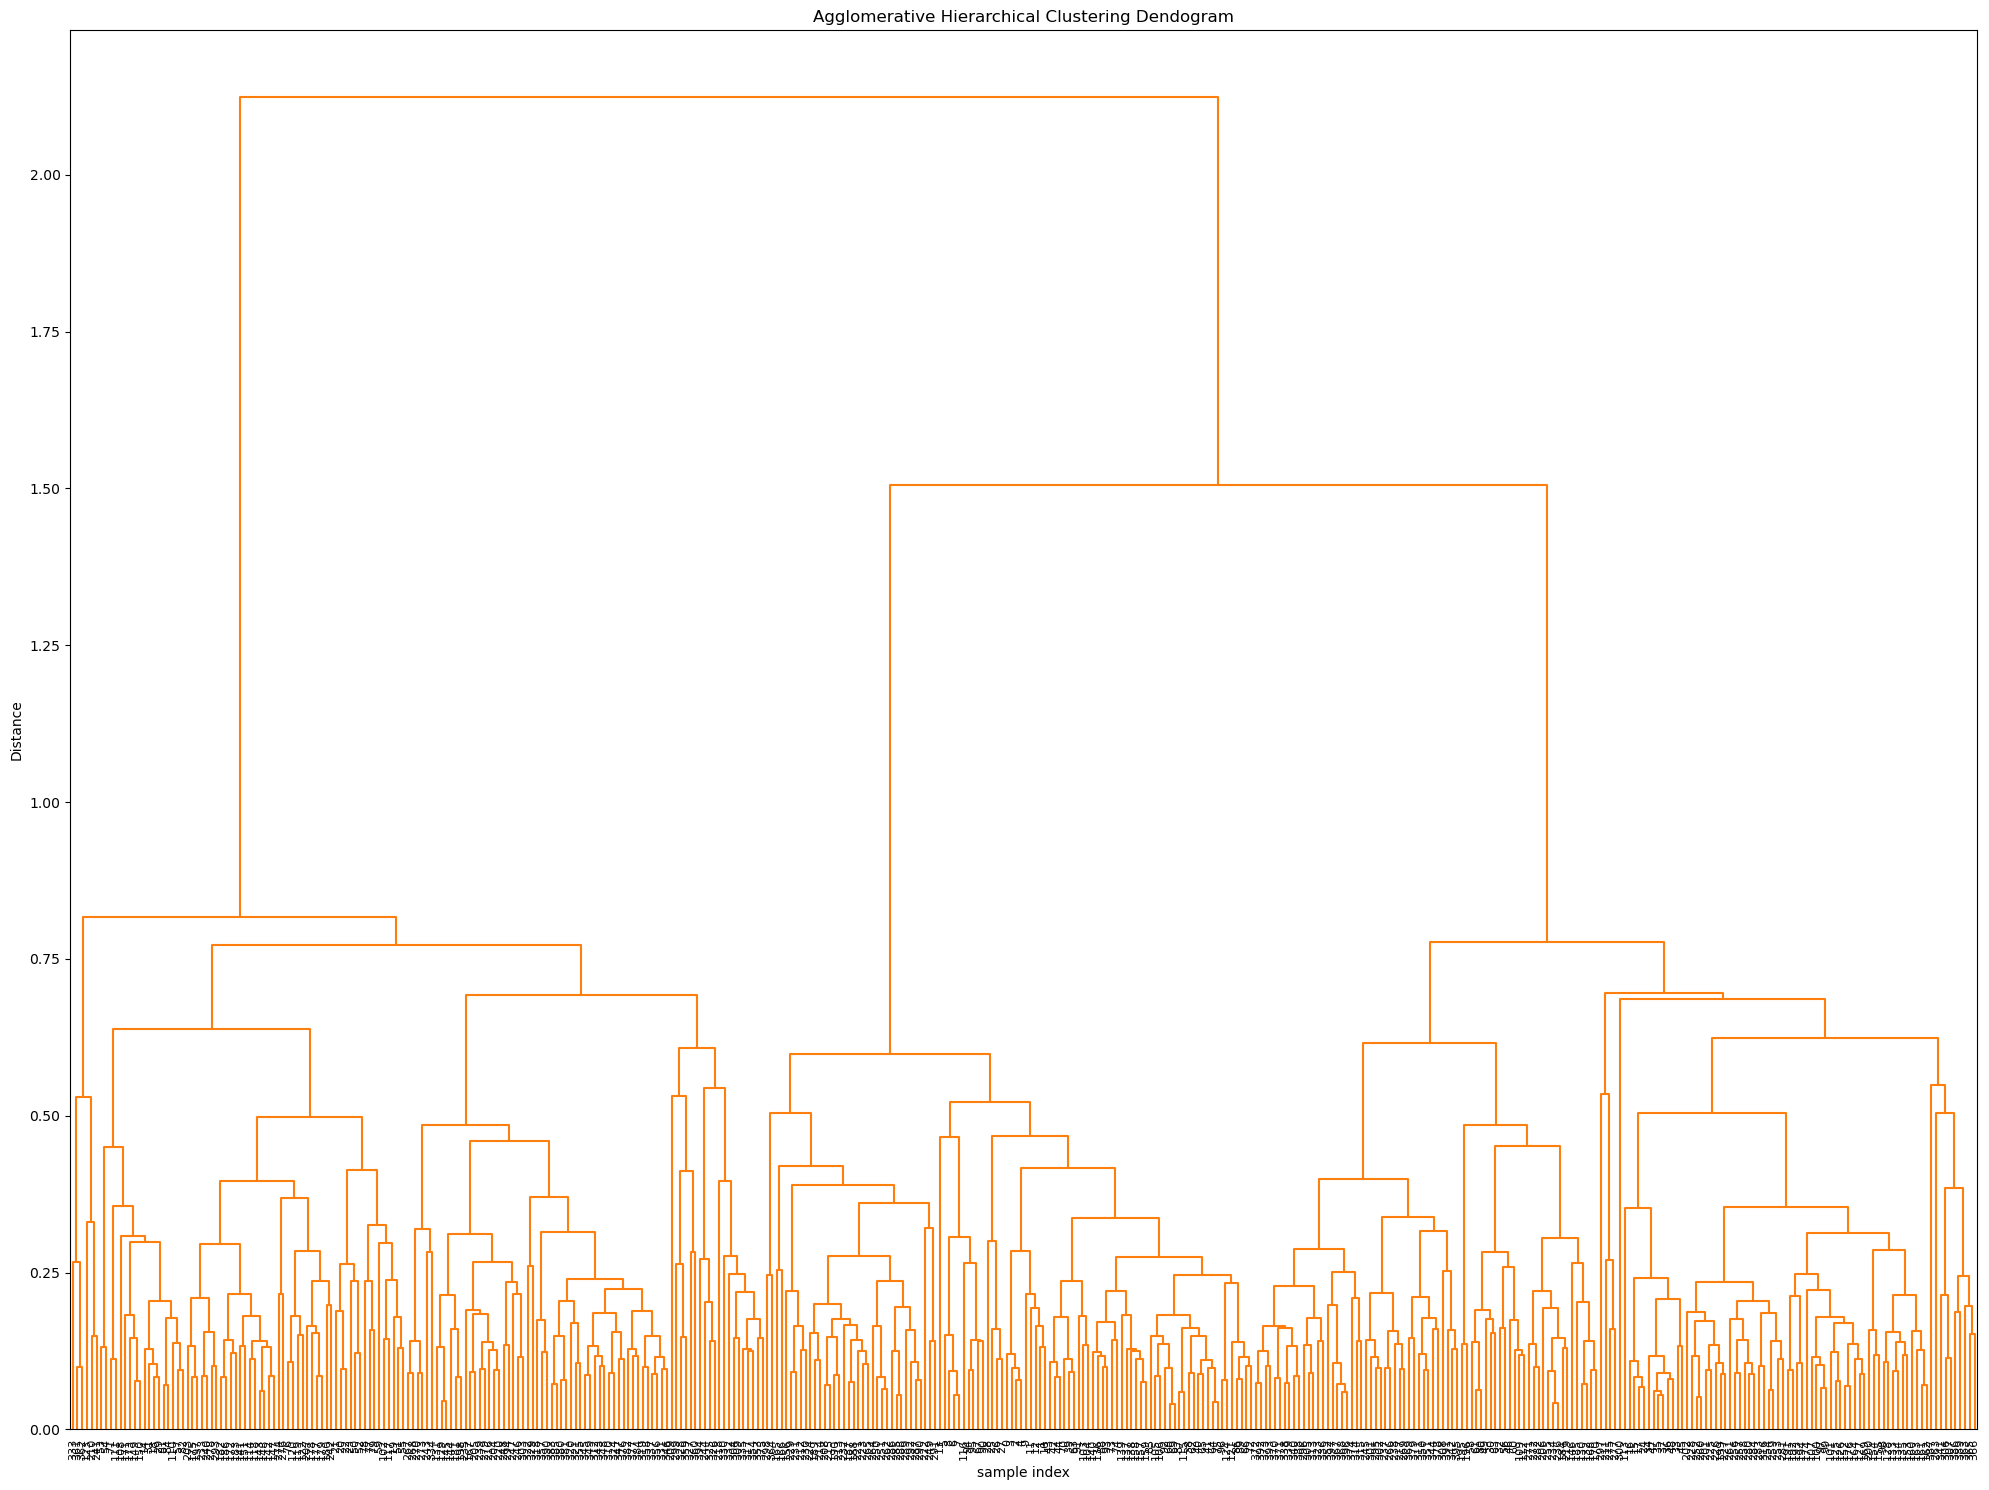

In [186]:
plt.figure(figsize=(20, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()
plt.show()

In [187]:
# let us check for other values of k
method= ['single','average','complete','ward']
for k in range(2,10):
    for j in method:
        model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage=j)
        model.fit(part1_all_scaled)
    
        Z = linkage(part1_all_scaled, metric='euclidean', method=j)
        c, coph_dists = cophenet(Z , pdist(part1_all_scaled))

        print('c for k =',k,'and method = ',j,'is = ',c)
    print('*'*50)


c for k = 2 and method =  single is =  0.9390259294287734
c for k = 2 and method =  average is =  0.9531401904951771
c for k = 2 and method =  complete is =  0.9318027064860388
c for k = 2 and method =  ward is =  0.9484825583968415
**************************************************
c for k = 3 and method =  single is =  0.9390259294287734
c for k = 3 and method =  average is =  0.9531401904951771
c for k = 3 and method =  complete is =  0.9318027064860388
c for k = 3 and method =  ward is =  0.9484825583968415
**************************************************
c for k = 4 and method =  single is =  0.9390259294287734
c for k = 4 and method =  average is =  0.9531401904951771
c for k = 4 and method =  complete is =  0.9318027064860388
c for k = 4 and method =  ward is =  0.9484825583968415
**************************************************
c for k = 5 and method =  single is =  0.9390259294287734
c for k = 5 and method =  average is =  0.9531401904951771
c for k = 5 and method =  compl

In [188]:
# Analysis on labeled dataset

print(part1_final_data_kmeans_df.groupby('Labels')['Labels'].value_counts().sort_values())
part1_final_data_kmeans_df.groupby('Labels').mean()

Labels  Labels
0       0         102
1       1         145
2       2         151
Name: Labels, dtype: int64


Mpg  Cylinders  Displacement  Horsepower       Weight  \
Labels                                                                
0       14.875490   8.000000    345.843137  158.970588  4121.529412   
1       29.537241   4.082759    103.979310   79.427586  2284.193103   
2       23.566887   5.052980    176.360927   91.264901  2851.821192   

        Acceleration  Model_year    Origin  
Labels                                      
0          12.864706   73.852941  1.000000  
1          16.458621   76.648276  2.544828  
2          16.539073   76.854305  1.026490

In [189]:
print(part1_final_data_agglo_df.groupby('Labels')['Labels'].value_counts().sort_values())
part1_final_data_agglo_df.groupby('Labels').mean()

Labels  Labels
0       0         102
1       1         145
2       2         151
Name: Labels, dtype: int64


Mpg  Cylinders  Displacement  Horsepower       Weight  \
Labels                                                                
0       14.875490   8.000000    345.843137  158.970588  4121.529412   
1       29.537241   4.082759    103.979310   79.427586  2284.193103   
2       23.566887   5.052980    176.360927   91.264901  2851.821192   

        Acceleration  Model_year    Origin  
Labels                                      
0          12.864706   73.852941  1.000000  
1          16.458621   76.648276  2.544828  
2          16.539073   76.854305  1.026490

Both the clustering models with  k = 3 produce same data labels or datapoints cluster are same

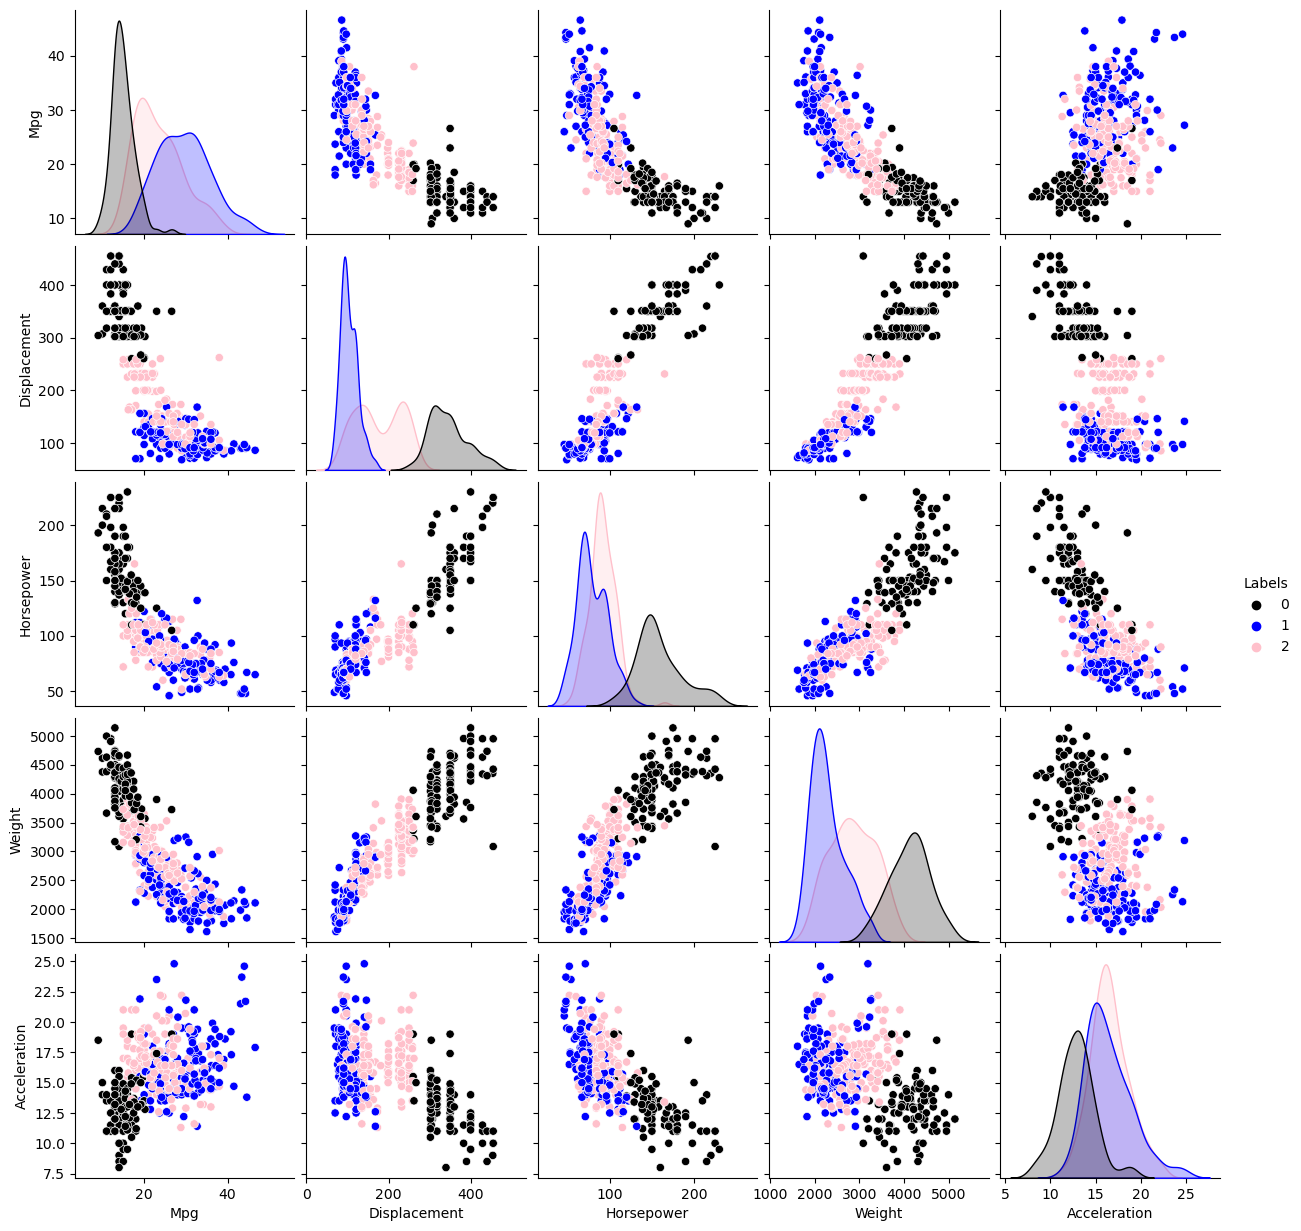

In [190]:
#plotting clusters
col = ['Mpg','Displacement','Horsepower','Weight','Acceleration']
sns.pairplot(x_vars = col,y_vars = col,data = part1_final_data_kmeans_df,hue = 'Labels',palette = { 0 :'black',
                                                                                                  1: 'blue',
                                                                                                  2: 'pink'})
plt.show()

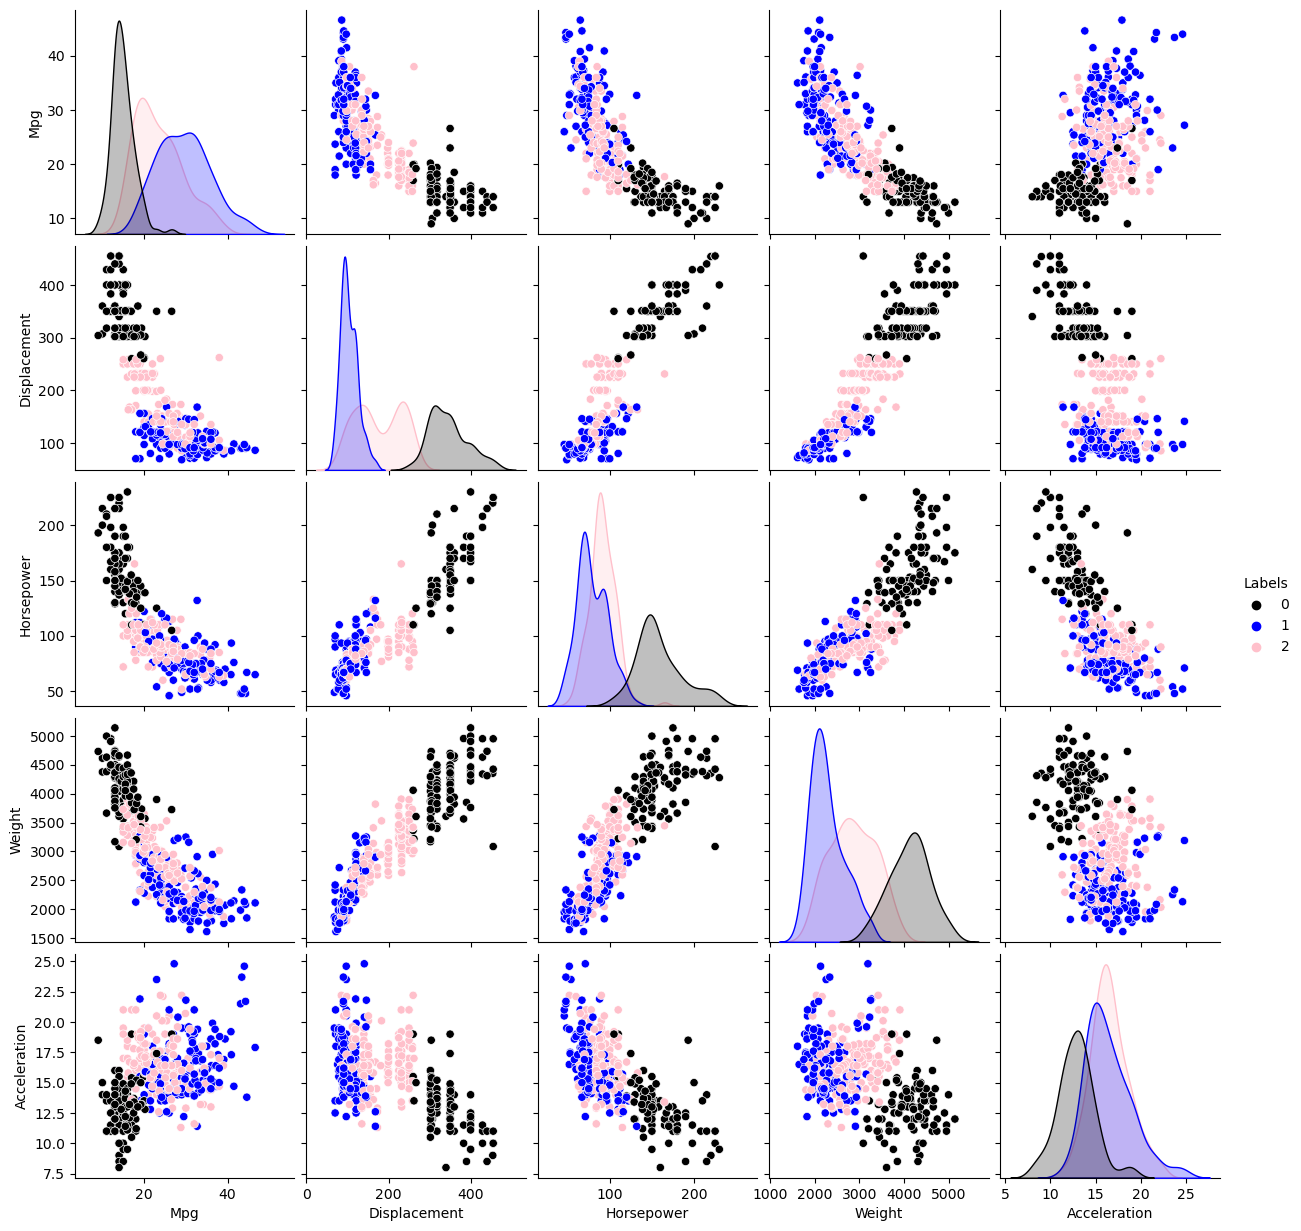

In [191]:
col = ['Mpg','Displacement','Horsepower','Weight','Acceleration']
sns.pairplot(x_vars = col,y_vars = col,data = part1_final_data_agglo_df,hue = 'Labels',palette = { 0 :'black',
                                                                                                  1: 'blue',
                                                                                                  2: 'pink'})
plt.show()

In [192]:
#need to answer above problems

#linear regression
data_0 = part1_final_data_kmeans_df[part1_final_data_kmeans_df['Labels'] == 0].drop(['car_name','Cylinders','Origin','Labels','Model_year'],axis = 1)
data_1 = part1_final_data_kmeans_df[part1_final_data_kmeans_df['Labels'] == 1].drop(['car_name','Cylinders','Origin','Labels','Model_year'],axis = 1)
data_2 = part1_final_data_kmeans_df[part1_final_data_kmeans_df['Labels'] == 2].drop(['car_name','Cylinders','Origin','Labels','Model_year'],axis = 1)
data_3 = part1_final_data_kmeans_df.drop(['car_name','Cylinders','Origin','Labels','Model_year'],axis = 1)

In [193]:
#data preprocessing
data_0 = pd.DataFrame(MinMaxScaler().fit_transform(data_0),columns = data_0.columns)
data_1 = pd.DataFrame(MinMaxScaler().fit_transform(data_1),columns = data_1.columns)
data_2 = pd.DataFrame(MinMaxScaler().fit_transform(data_2),columns = data_2.columns)
data_3 = pd.DataFrame(MinMaxScaler().fit_transform(data_3),columns = data_3.columns)

In [194]:
data_3

Mpg  Displacement  Horsepower    Weight  Acceleration
0    0.239362      0.617571    0.456522  0.536150      0.238095
1    0.159574      0.728682    0.646739  0.589736      0.208333
2    0.239362      0.645995    0.565217  0.516870      0.178571
3    0.186170      0.609819    0.565217  0.516019      0.238095
4    0.212766      0.604651    0.510870  0.520556      0.148810
..        ...           ...         ...       ...           ...
393  0.478723      0.186047    0.217391  0.333711      0.452381
394  0.930851      0.074935    0.032609  0.146583      0.988095
395  0.611702      0.173127    0.206522  0.193365      0.214286
396  0.505319      0.134367    0.179348  0.286929      0.630952
397  0.585106      0.131783    0.195652  0.313864      0.678571

[398 rows x 5 columns]

In [195]:
#dividing the dataset into independent and dependent
X_0 = data_0.drop('Mpg',axis = 1)
y_0 = data_0['Mpg']

X_1 = data_1.drop('Mpg',axis = 1)
y_1 = data_1['Mpg']

X_2 = data_2.drop('Mpg',axis = 1)
y_2 = data_2['Mpg']

X_3 = data_3.drop('Mpg',axis = 1)
y_3 = data_3['Mpg']


LR_Coeff_df = pd.DataFrame() 

model_0 = LinearRegression().fit(X_0,y_0)
dic0 = dict(enumerate(model_0.coef_))
dic0[len(dic0)] = model_0.intercept_
LR_Coeff_df = LR_Coeff_df.append(dic0,ignore_index=True,)

model_1 = LinearRegression().fit(X_1,y_1)
dic1 = dict(enumerate(model_1.coef_))
dic1[len(dic1)] = model_1.intercept_
print(len(dic1))
LR_Coeff_df = LR_Coeff_df.append(dic1,ignore_index=True,)

model_2 = LinearRegression().fit(X_2,y_2)
dic2 = dict(enumerate(model_2.coef_))
dic2[len(dic2)] = model_2.intercept_
LR_Coeff_df = LR_Coeff_df.append(dic2,ignore_index=True,)

model_3 = LinearRegression().fit(X_3,y_3)
dic3 = dict(enumerate(model_3.coef_))
dic3[len(dic3)] = model_3.intercept_
LR_Coeff_df = LR_Coeff_df.append(dic3,ignore_index=True,)


LR_Coeff_df.columns = ['Displacement','Horsepower','Weight','Acceleration'
                                         ,'intercept']


LR_Coeff_df.index = ['Cluster_0','Cluster_1','Cluster_2','single_model']

LR_Coeff_df.index_name = 'Models'

LR_Coeff_df

5


Displacement  Horsepower    Weight  Acceleration  intercept
Cluster_0         0.329816   -0.374528 -0.407074      0.216668   0.459758
Cluster_1         0.265792   -0.525565 -0.377149      0.030325   0.653375
Cluster_2        -0.355641   -0.503148 -0.110161     -0.290284   0.909872
single_model     -0.067422   -0.193614 -0.506619     -0.005509   0.666690

<b>5.Answer below questions based on outcomes of using ML based methods. </b><br><br>
    • Mention how many optimal clusters are present in the data and what could be the possible reason behind it.<br><br>
    • Use linear regression model on different clusters separately and print the coefficients of the models individually<br><br>
    • How  using  different  models  for  different  clusters  will  be  helpful  in  this  case  and  how  it  will  be  different  than  using  one  single  model  without clustering? Mention how it impacts performance and prediction.

In [196]:
# ** NOTE : ** there are 3 optimal clusters ->k = 2, 3, 4 but better one is 3

# ** NOTE : ** 
1. Due to less training data Cluster Models have high variance and bias whare Coeff of cluster models are very large when comapred to single model
2. Ther performance of cluster models will be very less when compared to single model 
3. cluster models are not useful for predictions 

<b>Improvisation: </b>
 1. Use tabular data in xlx or csv not jason
 2. add eveything int one file instaed of two files if we have similar data and rows and less columns


# <font color= 'purple'>END OF PART 1 </font>

# <font color= 'green'>PART 2 </font>

<b>•DOMAIN: </b>Manufacturing <br>
<b>•CONTEXT:</b> Company X curates and packages wine across various vineyards spread throughout the country.<br>
<b>•DATA DESCRIPTION:</b> The data concerns the chemical composition of the wine and its respective quality.Attribute Information: 1.A, B, C, D: specific chemical composition measure of the wine2.Quality: quality of wine [ Low and High ]<br>
<b>•PROJECT OBJECTIVE:</b> Goal is to build a synthetic data generation model using the existing data provided by the company.

In [197]:
#importing dataset
part2_data = pd.read_excel("D:/Datasets/Unsupervised_learning_project_pdp/Part2 - Company.xlsx")
part2_data.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [198]:
part2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [199]:
#checking null values
part2_data

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
..  ...  ...  ...  ...        ...
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

[61 rows x 5 columns]

In [200]:
#since nan values in quality so we will check various aggregatives
part2_data.describe()

A           B           C           D
count   61.000000   61.000000   61.000000   61.000000
mean   118.557377  116.639344  114.081967  114.459016
std     61.771494   57.897908   65.615368   63.144431
min      3.000000    5.000000    3.000000    3.000000
25%     61.000000   63.000000   59.000000   51.000000
50%    136.000000  138.000000  135.000000  132.000000
75%    171.000000  168.000000  174.000000  174.000000
max    200.000000  200.000000  200.000000  199.000000

In [201]:
# data cleaning 

#1 .checking for other values other than nan and number
for i in part2_data.columns:
    print('{} : {} \n'.format(i,part2_data[i].unique()) )
    print('*'*80)

A : [ 47 174 159  61  59 153  34 191 160 145  76 138  27  45 186 196   4  96
 167   5   3 171 101 103 170 193  85  29 135 142 161 183 181 185 132  44
 102 179  73  48 169  22 197  28 136 110 188  91  70 200 137  88 180 157] 

********************************************************************************
B : [ 27 133 163  23  60 140  28 144 181 178  94 200 106  76 142 145  61 109
 171 100  63 185 104  74 153 169  58  49 159 138 174 147 168 157   5 143
  22  68 184   9  90 173  91 161 199  44  33  13  96 186 182  39 135] 

********************************************************************************
C : [ 45 134 135   3   9 154  78 143 194 158 107 153  57  56 146 166  72  75
 163 165 142  32 109 181  95  59 199  44   6 176 190 164 174 160   8 189
  83  98 200  25  17 182  66  76 175  14  70  15 185 192] 

********************************************************************************
D : [108 166 131  44  68 199  22 154 178 141  37 192  57 174 132  98  34 191
 177 110  67 183  49  

In [202]:
#note : C has empty value 

In [203]:
from sklearn.impute import KNNImputer
part2_imputed = part2_data
part2_imputed['Quality'] = part2_imputed['Quality'].replace({'Quality A':0,'Quality B':1})
z = KNNImputer().fit_transform(part2_imputed)
part2_imputed = pd.DataFrame(z,columns = part2_imputed.columns)
part2_imputed['Quality'] = part2_imputed['Quality'].astype('int')
part2_imputed

A      B      C      D  Quality
0    47.0   27.0   45.0  108.0        0
1   174.0  133.0  134.0  166.0        1
2   159.0  163.0  135.0  131.0        1
3    61.0   23.0    3.0   44.0        0
4    59.0   60.0    9.0   68.0        0
..    ...    ...    ...    ...      ...
56  200.0  186.0  185.0  179.0        1
57  137.0  182.0  165.0  199.0        1
58   88.0   39.0    9.0  102.0        0
59  180.0  157.0  192.0  198.0        1
60  157.0  135.0  135.0  156.0        1

[61 rows x 5 columns]

In [204]:
#scaling 
part2_scaled = pd.DataFrame(MinMaxScaler().fit_transform(part2_imputed),columns = part2_imputed.columns)
part2_scaled.head()

A         B         C         D  Quality
0  0.223350  0.112821  0.213198  0.535714      0.0
1  0.868020  0.656410  0.664975  0.831633      1.0
2  0.791878  0.810256  0.670051  0.653061      1.0
3  0.294416  0.092308  0.000000  0.209184      0.0
4  0.284264  0.282051  0.030457  0.331633      0.0

In [205]:
# data analysics
# stat analysics

# 1. one-way anova for cylinders
# H0 : All the means are Equal
# Ha : All the means are not equal
def wines_one_way_anova(data):
    f0 = (data['Quality'] == 0)
    f1 = (data['Quality'] == 1)
    

    stats_df = pd.DataFrame({},columns =['Result','Outcome'])
    for c in data.columns[:-1]:
        sample0 = data.loc[f0,c]
        sample1 = data.loc[f1,c]
        
        anova_stats,p_val = stats.f_oneway(sample0,sample1)
        if (p_val < 0.05):
            df = pd.DataFrame({'Result':['means are not equal'],
                            'Outcome':['reject null hypothesis']})
                
            stats_df = pd.concat([stats_df,df],axis = 0)
            
        else:
            df = pd.DataFrame({'Result':['mean equal'],
                              'Outcome':['fail to reject null hypothesis']})
            
            stats_df = pd.concat([stats_df,df],axis = 0)
            
    stats_df.index = data.columns[:-1]
    
    return stats_df

In [206]:
wines_one_way_anova(part2_scaled)

Result                 Outcome
A  means are not equal  reject null hypothesis
B  means are not equal  reject null hypothesis
C  means are not equal  reject null hypothesis
D  means are not equal  reject null hypothesis

In [207]:
wines_one_way_anova(part2_imputed)

Result                 Outcome
A  means are not equal  reject null hypothesis
B  means are not equal  reject null hypothesis
C  means are not equal  reject null hypothesis
D  means are not equal  reject null hypothesis

In [208]:
part2_imputed.groupby('Quality')[part2_imputed.columns].mean()

A           B           C           D  Quality
Quality                                                        
0         58.75000   60.928571   49.750000   53.000000      0.0
1        169.30303  163.909091  168.666667  166.606061      1.0

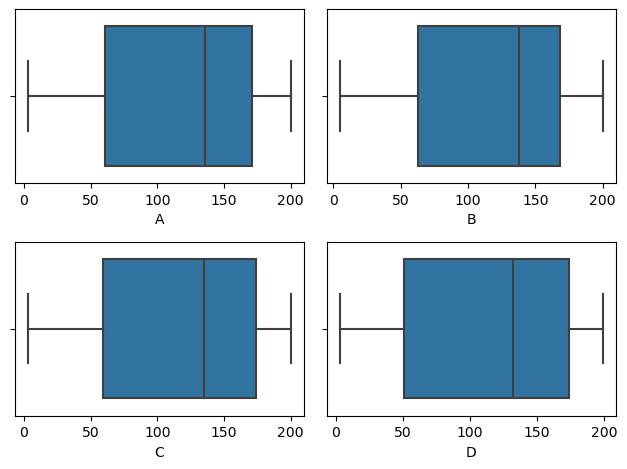

In [209]:
# visualization
for i,col in enumerate(part2_imputed.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = col,data = part2_imputed)
plt.tight_layout()
plt.show()

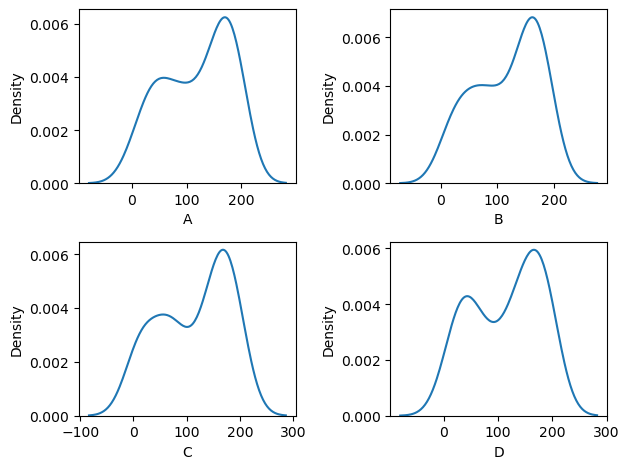

In [210]:
for i,col in enumerate(part2_imputed.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x = col,data = part2_imputed)
plt.tight_layout()
plt.show()

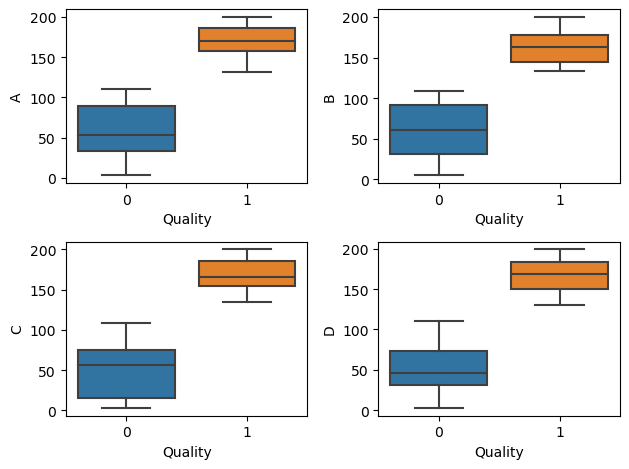

In [211]:
for i,col in enumerate(part2_imputed.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = col,x = 'Quality' ,data = part2_imputed)
plt.tight_layout()
plt.show()

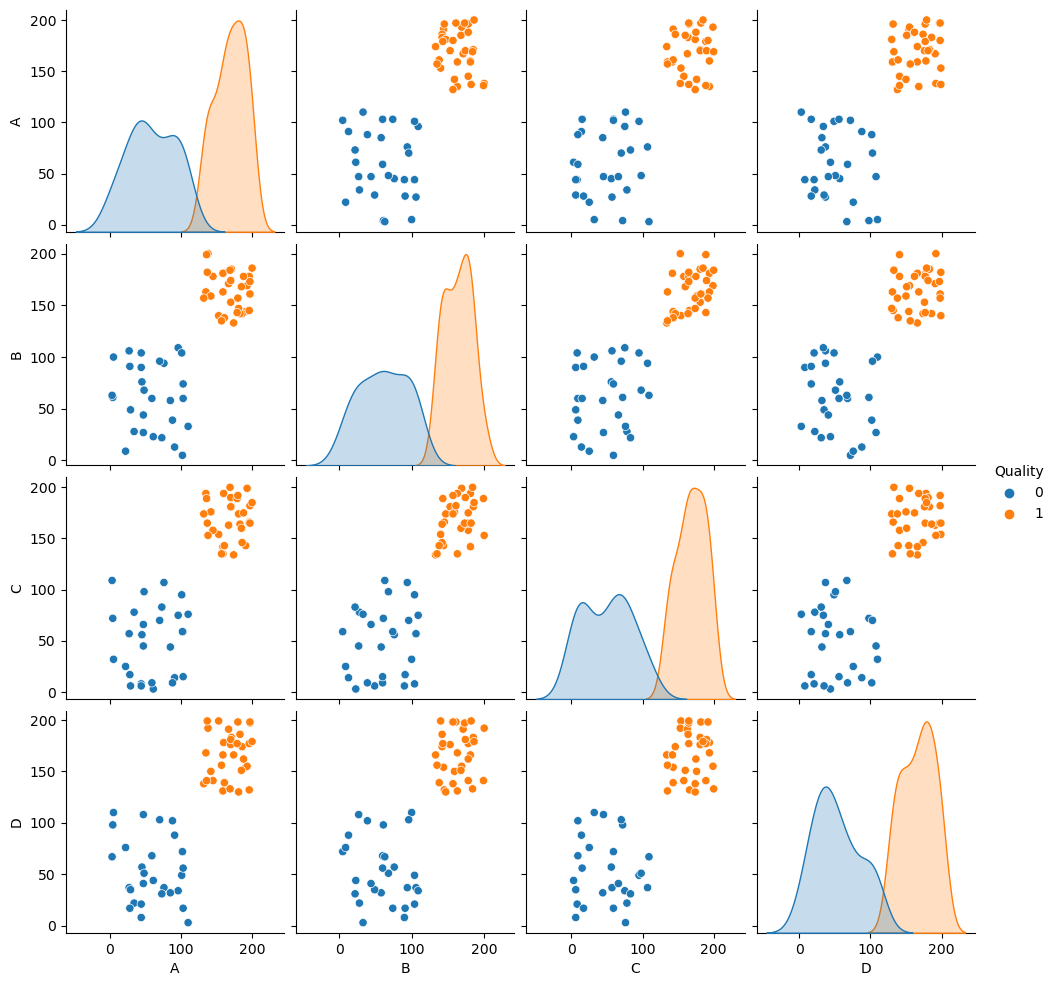

In [212]:
sns.pairplot(x_vars = part2_imputed.columns[:-1],y_vars = part2_imputed.columns[:-1],data = part2_imputed,hue ='Quality')
plt.show()

In [213]:
# we can see that our knn has imputed every value correctly 

In [214]:
#kmeans cluster with n_clusters = 2
model = KMeans(n_clusters=2)
model.fit(part2_scaled.drop('Quality',axis = 1))
labels = model.labels_

In [215]:
part2_imputed['Labels'] = labels
part2_imputed.head()

A      B      C      D  Quality  Labels
0   47.0   27.0   45.0  108.0        0       1
1  174.0  133.0  134.0  166.0        1       0
2  159.0  163.0  135.0  131.0        1       0
3   61.0   23.0    3.0   44.0        0       1
4   59.0   60.0    9.0   68.0        0       1

In [216]:
count = 0
for i ,j in zip(part2_imputed['Quality'],part2_imputed['Labels']):
    if(i == j):
        count = count+1
        
print('accuarcy  = ',int(count/part2_imputed['Quality'].shape[0])*100,'%')


accuarcy  =  0 %


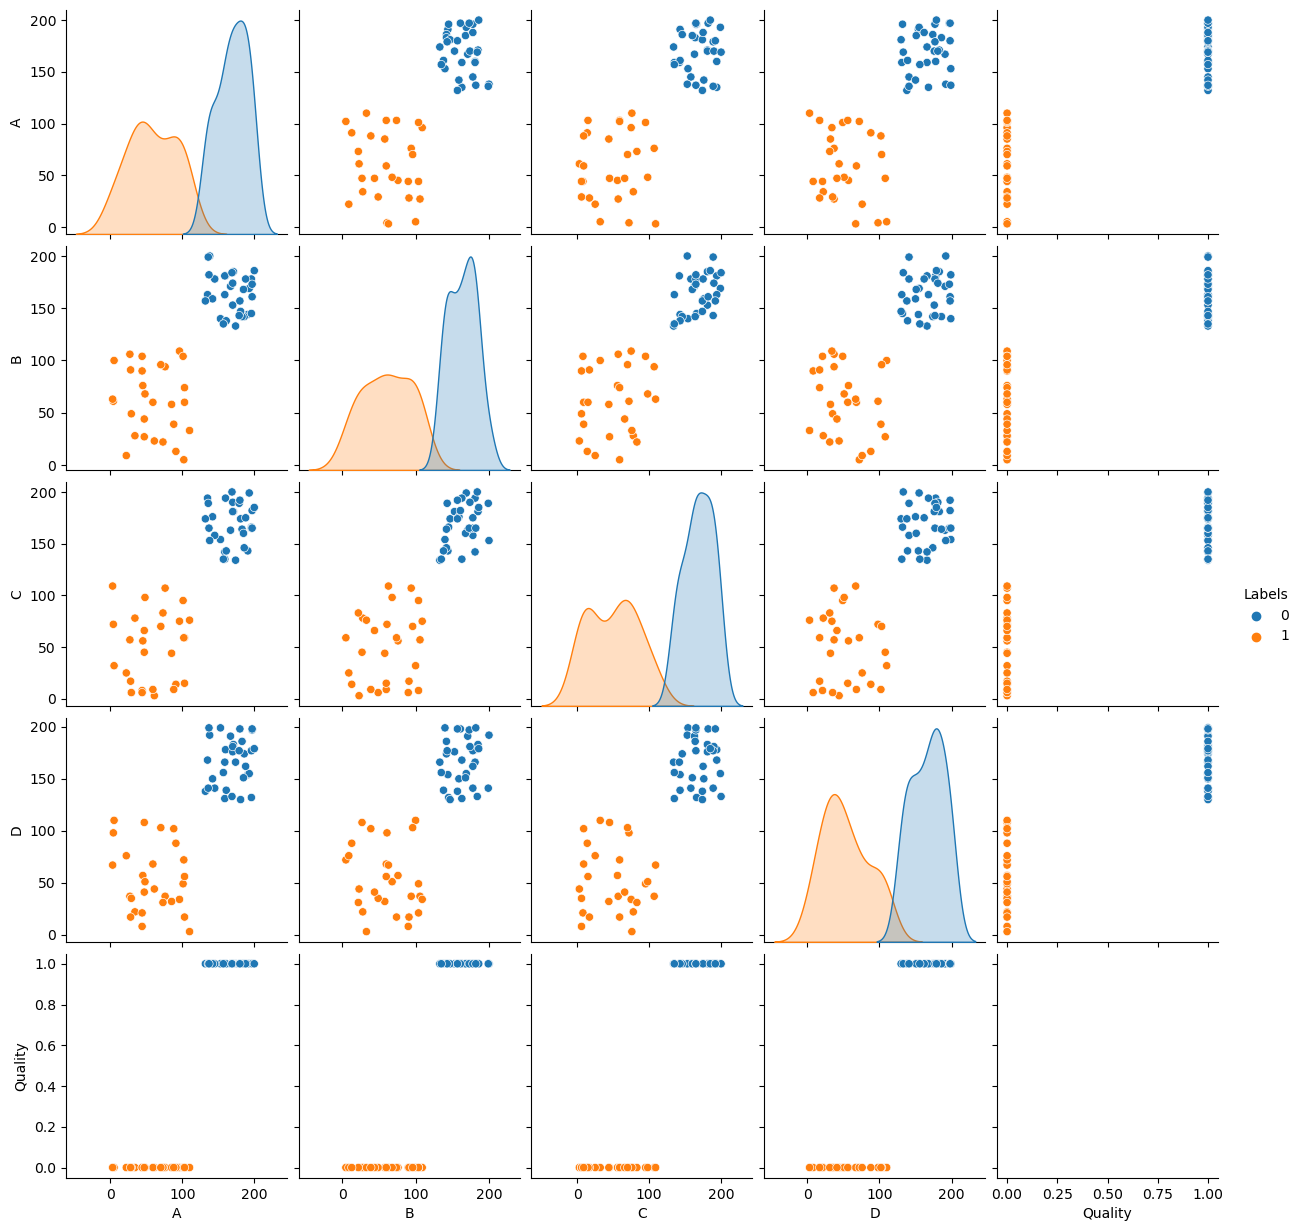

In [217]:
sns.pairplot(x_vars = part2_imputed.columns[:-1],y_vars = part2_imputed.columns[:-1],data = part2_imputed,hue ='Labels')
plt.show()

In [218]:
# hierarcial clusetering
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model2.fit(part2_imputed.drop(['Quality','Labels'],axis = 1))
labels = model2.labels_ 

In [219]:
count = 0
for i ,j in zip(part2_imputed['Quality'],labels):
    if(i == j):
        count = count+1
        
print('accuarcy  = ',int(count/part2_imputed['Quality'].shape[0])*100,'%')


accuarcy  =  100 %


In [220]:
# well i recommed kmeans clustering for filling those nan values with k = 2 

# <font color= 'purple'>END OF PART 2 </font>

# <font color= 'green'>PART 3 </font>

<b>•DOMAIN:</b> Automobile <br>
<b>•CONTEXT:</b> The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.<br>

<b>•DATA  DESCRIPTION: </b>The  data  contains  features  extracted  from  the  silhouette  of  vehicles  in  different  angles.  Four  "Corgie"  model  vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.•All the features are numeric i.e. geometric features extracted from the silhouette.<br>

<b>•PROJECT OBJECTIVE:</b> Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

In [221]:
#importing datasets
part3_data = pd.read_csv('D:/Datasets/Unsupervised_learning_project_pdp/Part3 - vehicle.csv')
part3_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [222]:
#getting informations about coloumns
part3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [223]:
#checking for null values
part3_data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [224]:
# data cleaning
part3_imputed = part3_data
part3_imputed['class'] = part3_imputed ['class'].replace({'car':0,'van':1,'bus':2})
part3_imputed = pd.DataFrame(KNNImputer().fit_transform(part3_imputed),columns = part3_imputed.columns)
part3_imputed['class'] = part3_imputed['class'].astype('Int64')
#print(part3_imputed['class'].unique())
part3_imputed.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0      1  
1             189.0          199.0      1  
2             188.0          196.0      0  
3             199.0          207.0      1  
4             180.0          183.0      2

In [225]:
#scaling
part3_scaled = pd.DataFrame(MinMaxScaler().fit_transform(part3_imputed.drop('class',axis = 1)),columns = part3_imputed.columns[:-1])
part3_scaled['class'] = part3_imputed['class']
part3_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.478261     0.576923              0.597222      0.323144   
1     0.391304     0.307692              0.611111      0.161572   
2     0.673913     0.653846              0.916667      0.458515   
3     0.434783     0.307692              0.583333      0.240175   
4     0.260870     0.423077              0.416667      0.441048   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.274725                 0.150943       0.326797   
1              0.109890                 0.132075       0.241830   
2              0.208791                 0.150943       0.620915   
3              0.175824                 0.132075       0.209150   
4              0.615385                 0.943396       0.241830   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.457143                0.250000                   0.585714   
1       0.542857                0.166667                   0.357143   
2       0.171429                0.500000                   0.571429   
3       0.571429                0.166667                   0.357143   
4       0.542857                0.166667                   0.371429   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.242105           0.233813                   0.471698   
1         0.210526           0.175060                   0.308176   
2         0.489474           0.540767                   0.698113   
3         0.157895           0.149880                   0.113208   
4         0.584211           0.169065                   0.496855   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.144737        0.272727          0.390244   
1                     0.171053        0.409091          0.341463   
2                     0.184211        0.636364          0.219512   
3                     0.052632        0.272727          0.243902   
4                     0.894737        0.409091          0.268293   

   skewness_about.2  hollows_ratio  class  
0          0.366667       0.533333      1  
1          0.433333       0.600000      1  
2          0.400000       0.500000      0  
3          0.766667       0.866667      1  
4          0.133333       0.066667      2

In [226]:
part3_scaled.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean      0.449532     0.456292              0.584673      0.283648   
std       0.179010     0.237267              0.219073      0.146103   
min       0.000000     0.000000              0.000000      0.000000   
25%       0.304348     0.269231              0.416667      0.161572   
50%       0.434783     0.423077              0.555556      0.275109   
75%       0.586957     0.615385              0.805556      0.397380   
max       1.000000     1.000000              1.000000      1.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean               0.161445                 0.123913       0.371500   
std                0.086663                 0.086815       0.217285   
min                0.000000                 0.000000       0.000000   
25%                0.109890                 0.094340       0.223856   
50%                0.153846                 0.113208       0.294118   
75%                0.197802                 0.150943       0.562092   
max                1.000000                 1.000000       1.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean        0.426687                0.298562                   0.428555   
std         0.223188                0.216012                   0.207366   
min         0.000000                0.000000                   0.000000   
25%         0.200000                0.166667                   0.271429   
50%         0.485714                0.250000                   0.400000   
75%         0.571429                0.500000                   0.585714   
max         1.000000                1.000000                   1.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean          0.308553           0.306861                   0.413273   
std           0.165279           0.211880                   0.204694   
min           0.000000           0.000000                   0.000000   
25%           0.194737           0.160971                   0.251572   
50%           0.255263           0.215827                   0.406918   
75%           0.457895           0.483213                   0.559748   
max           1.000000           1.000000                   1.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                      0.177168        0.289426          0.307311   
std                       0.098449        0.223103          0.217832   
min                       0.000000        0.000000          0.000000   
25%                       0.105263        0.090909          0.121951   
50%                       0.171053        0.272727          0.268293   
75%                       0.210526        0.409091          0.463415   
max                       1.000000        1.000000          1.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean           0.430898       0.487746    0.750591  
std            0.205198       0.247960    0.838691  
min            0.000000       0.000000    0.000000  
25%            0.266667       0.308333    0.000000  
50%            0.400000       0.533333    0.000000  
75%            0.566667       0.666667    2.000000  
max            1.000000       1.000000    2.000000

In [227]:
part3_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [228]:
#implementing PCA 
from sklearn.decomposition import PCA
x = part3_scaled.drop(['class'],axis = 1)
y = part3_scaled['class']

pca = PCA(n_components = 6)
pca_df = pd.DataFrame(pca.fit_transform(x),columns = ['pca_1','pca_2','pca_3','pca45','pca_5','pca_6'])
pca_df

pca_1     pca_2     pca_3     pca45     pca_5     pca_6
0    0.050097 -0.005928  0.013531 -0.004187  0.254586 -0.020179
1   -0.307884  0.133442  0.070771  0.123106  0.045911 -0.055341
2    0.754952 -0.034632  0.282791  0.139311 -0.090252  0.118598
3   -0.370240  0.562852  0.076772 -0.128863  0.023271 -0.073193
4   -0.184589 -0.605331  0.038072  0.056969  0.408161  1.054981
..        ...       ...       ...       ...       ...       ...
841 -0.132253  0.129379 -0.269654  0.270565 -0.101721  0.146604
842 -0.060279 -0.037049 -0.232337 -0.066582  0.304038 -0.089667
843  0.965489 -0.013697  0.015977 -0.324412 -0.025602 -0.004999
844 -0.683109  0.153851 -0.424095  0.077013  0.023682 -0.052490
845 -0.962269 -0.096256 -0.271248  0.046538  0.024828 -0.096944

[846 rows x 6 columns]

In [229]:
# eign values 
print(pca.explained_variance_)


[0.39669533 0.1189308  0.0561673  0.04423785 0.02053293 0.01800638]


In [230]:
#eign vectors
print(pca.components_)

[[ 0.23834092  0.34626593  0.32506414  0.1813058   0.02494014  0.03382625
   0.33811928 -0.34160899  0.33351893  0.28975824  0.24693318  0.32717404
   0.27624312 -0.01071645  0.04719333  0.06031969  0.01976968  0.07792472]
 [ 0.12950419 -0.14440704  0.10010792  0.14748293  0.0560361   0.0085956
  -0.03186989 -0.03252418 -0.04548314 -0.10803777 -0.03068591 -0.03605513
  -0.20637405 -0.22964081  0.07429453  0.17421948  0.55926624  0.68217048]
 [ 0.07353169  0.17276333 -0.06856395 -0.03331042  0.00345572  0.00347088
  -0.09421422  0.08928177 -0.09009806  0.14883093 -0.08908965 -0.08776781
   0.16520816 -0.0346247   0.70297661 -0.59628404  0.11559436  0.06760094]
 [ 0.05187251 -0.1091297   0.04258728 -0.09986561 -0.11181429 -0.0397473
   0.0294847   0.04552338  0.0492027  -0.09512346 -0.0097531   0.03201728
  -0.05534282  0.03103664  0.66995618  0.66945466 -0.15347606 -0.13931151]
 [-0.25503965  0.36173954  0.02469862  0.05760947  0.20889824  0.30219343
  -0.21277964  0.20636899 -0.2108646

In [231]:
#variance explained
print(pca.explained_variance_ratio_)
print(np.round_(pca.explained_variance_ratio_,2)*100)

[0.57993641 0.17386718 0.08211204 0.06467215 0.03001748 0.02632386]
[58. 17.  8.  6.  3.  3.]


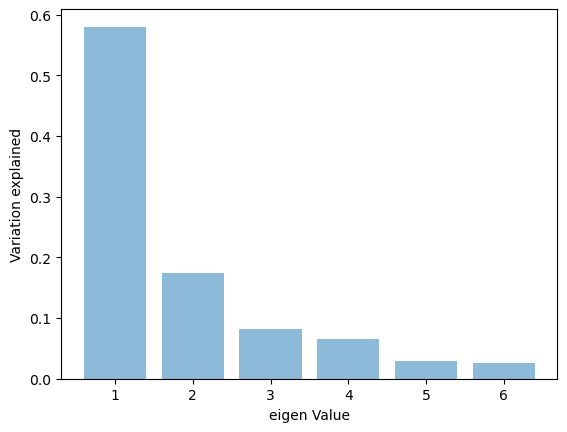

In [232]:
plt.bar(np.arange(1,7),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

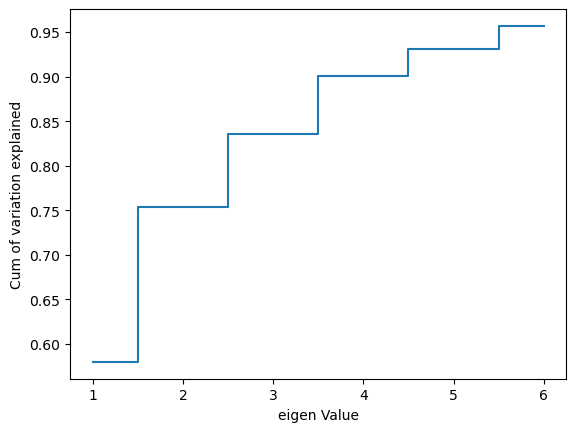

In [233]:
plt.step(np.arange(1,7),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [234]:
# we cans see that 4 pca's explain almost explains 89% of data
pca = PCA(n_components = 6)
pca_df4 = pd.DataFrame(pca.fit_transform(x),columns = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6'])
pca_df4

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6
0    0.050097 -0.005928  0.013531 -0.004187  0.254586 -0.020179
1   -0.307884  0.133442  0.070771  0.123106  0.045911 -0.055341
2    0.754952 -0.034632  0.282791  0.139311 -0.090252  0.118598
3   -0.370240  0.562852  0.076772 -0.128863  0.023271 -0.073193
4   -0.184589 -0.605331  0.038072  0.056969  0.408161  1.054981
..        ...       ...       ...       ...       ...       ...
841 -0.132253  0.129379 -0.269654  0.270565 -0.101721  0.146604
842 -0.060279 -0.037049 -0.232337 -0.066582  0.304038 -0.089667
843  0.965489 -0.013697  0.015977 -0.324412 -0.025602 -0.004999
844 -0.683109  0.153851 -0.424095  0.077013  0.023682 -0.052490
845 -0.962269 -0.096256 -0.271248  0.046538  0.024828 -0.096944

[846 rows x 6 columns]

In [235]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(pca_df4,y.astype('int64'),test_size = 0.25,random_state = 1)

In [236]:
X_train.head()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6
299 -0.064814  0.411482 -0.184567 -0.031346 -0.223379  0.031306
602  0.948206  0.061840 -0.003962  0.183392 -0.023660  0.156668
218 -0.406928 -0.296458  0.016507 -0.319136  0.040816 -0.041029
661  0.441081  0.363810  0.202875  0.007757 -0.250692  0.036121
670  0.545478 -0.028073  0.467874 -0.090461  0.024161  0.014361

In [237]:
X_test.head()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6
693 -0.144662 -0.293436 -0.222623 -0.094966  0.216826 -0.177818
375  0.922606 -0.361210 -0.377738 -0.042118 -0.260439 -0.006697
185  0.026091  0.313637 -0.129746  0.089819 -0.227015  0.187727
464  0.343571  0.207162 -0.038808 -0.213949  0.024356  0.031771
709  0.105733  0.343637 -0.484934  0.083693 -0.009908  0.049503

In [238]:
y_train.head()

299    2
602    0
218    2
661    0
670    0
Name: class, dtype: int64

In [239]:
y_test.head()

693    1
375    2
185    2
464    2
709    0
Name: class, dtype: int64

In [240]:
y.unique()

<IntegerArray>
[1, 0, 2]
Length: 3, dtype: Int64

In [241]:
#building logistic regression for PCA data

from sklearn.svm import SVC
lr = SVC()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [243]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

confusion_matrix(y_test,y_pred)

0.8533123028391167
0.8207547169811321


array([[93, 12,  2],
       [ 6, 44,  3],
       [12,  3, 37]], dtype=int64)

In [244]:
#SVC for original dataset
X_train,X_test,y_train,y_test = train_test_split(x,y.astype('int64'),test_size = 0.25,random_state = 1)

lr = SVC()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

confusion_matrix(y_test,y_pred)

0.944794952681388
0.9669811320754716


array([[103,   3,   1],
       [  1,  51,   1],
       [  0,   1,  51]], dtype=int64)

# ** NOTE **
1. With decrease columns from 18 to 6 the accuracy is dropped 10% using SVM classifier
2. Those 6 PCA's are able to explain 95% variations in the dataset

# <font color= 'purple'>END OF PART 3 </font>

# <font color= 'green'>PART 4 </font>

<b>•DOMAIN:</b> Sports management <br>
<b>•CONTEXT:</b> Company X is a sports management company for international cricket. <br>
<b>•DATA DESCRIPTION:</b> The data is collected belongs to batsman from IPL series conducted so far. <br>
<b>Attribute Information:</b> <br>
    1.Runs: Runs score by the batsman<br>
    2.Ave: Average runs scored by the batsman per match<br>
    3.SR: strike rate of the batsman<br>
    4.Fours: number of boundary/four scored<br>
    5.Six: number of boundary/six scored<br>
    6.HF: number of half centuries scored so far<br>
<b>•PROJECT OBJECTIVE: </b>Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.<br>

In [245]:
#importing datasets
part4_data = pd.read_csv('D:/Datasets/Unsupervised_learning_project_pdp/Part4 - batting_bowling_ipl_bat.csv')
part4_data.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [246]:
#remoing those rows where all the rows are empty and converting every row into int
part4_data2 = part4_data.dropna(thresh = part4_data.shape[1],axis = 0)
part4_data2[part4_data2.columns[1:]] = part4_data2[part4_data2.columns[1:]].astype('int')
part4_data2


Name  Runs  Ave   SR  Fours  Sixes  HF
1       CH Gayle   733   61  160     46     59   9
3      G Gambhir   590   36  143     64     17   6
5       V Sehwag   495   33  161     57     19   5
7       CL White   479   43  149     41     20   5
9       S Dhawan   569   40  129     58     18   5
..           ...   ...  ...  ...    ...    ...  ..
171       Z Khan    12    6   70      1      0   0
173   WD Parnell    19    4   70      2      0   0
175  PC Valthaty    30    5   58      4      0   0
177     RP Singh     6    3   50      0      0   0
179     R Sharma     2    0   18      0      0   0

[90 rows x 7 columns]

In [247]:
part4_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    90 non-null     object
 1   Runs    90 non-null     int32 
 2   Ave     90 non-null     int32 
 3   SR      90 non-null     int32 
 4   Fours   90 non-null     int32 
 5   Sixes   90 non-null     int32 
 6   HF      90 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 3.5+ KB


In [248]:
part4_data2.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.322222  118.688889  19.788889   7.577778   1.188889
std    156.253669  13.647923   23.656077  16.399845   8.001373   1.688656
min      2.000000   0.000000   18.000000   0.000000   0.000000   0.000000
25%     98.000000  14.250000  108.000000   6.250000   3.000000   0.000000
50%    196.500000  24.000000  120.000000  16.000000   6.000000   0.500000
75%    330.750000  31.500000  131.750000  28.000000  10.000000   2.000000
max    733.000000  81.000000  164.000000  73.000000  59.000000   9.000000

In [249]:
#data cleaning
for i in part4_data2.columns[1:]:
    print('{} : {}'.format(i,part4_data2[i].unique()))
    print('-'*50)

Runs : [733 590 495 479 569 560 305 433 319 244 256 255 398 340 371 396 441 333
 432 462 157 336 362 285 405 220 335 364 225 324 261 409 357 213 245 126
 172 289 176 186 143 196  98 260 107 197 120 145 191 200 153  90 238 194
 268 108  83  75 132 127 106  91 140 124  35  68  58  31  69  55  32  18
  40  19  16  12  30   6   2]
--------------------------------------------------
Ave : [61 36 33 43 40 30 39 81 42 37 46 25 27 28 35 24 20 29 32 23 34 26 15 19
 18 22 17 12 13 14 16 11  8  7  9 10  6  3  5  4  0]
--------------------------------------------------
SR : [160 143 161 149 129 147 126 128 164 151 130 132 140 135 112 125 109 118
 120 138 111 142 114 110 106 133 113 102 139 127 108 105 157 115 122  98
 134 117 131 104  99 100 116 107 119 103  90  80  70  58  50  18]
--------------------------------------------------
Fours : [46 64 57 41 58 73 22 39 26 13 28 29 24 20 36 21 53 63 18 33 38 15 19 34
 16 23  9 37 14 12  6  5 10  8 30  4  7  3  2  0  1]
-----------------------------------

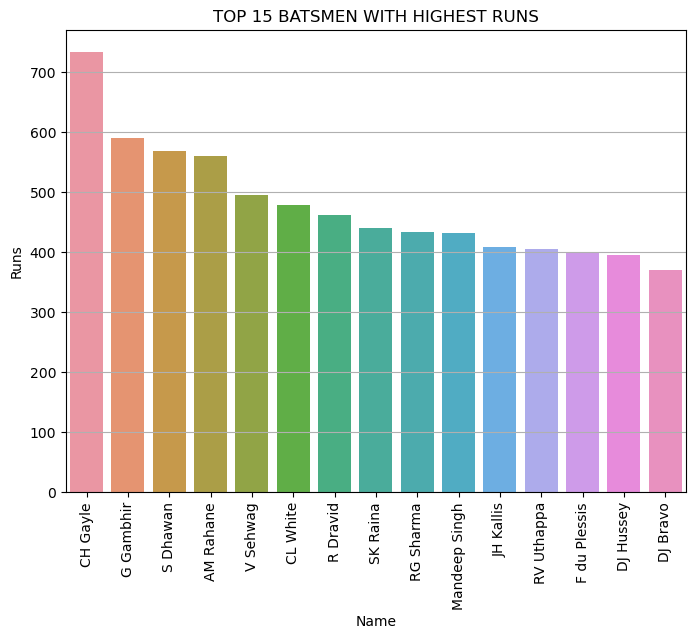

In [250]:
# data visualization
plt.figure(figsize= (8,6))
sns.barplot(x = 'Name',y = 'Runs',data = part4_data2.sort_values(by = 'Runs',ascending = False).head(15))
plt.xticks(rotation = 90)
plt.title('TOP 15 BATSMEN WITH HIGHEST RUNS')
plt.grid(axis = 'y')
plt.show()

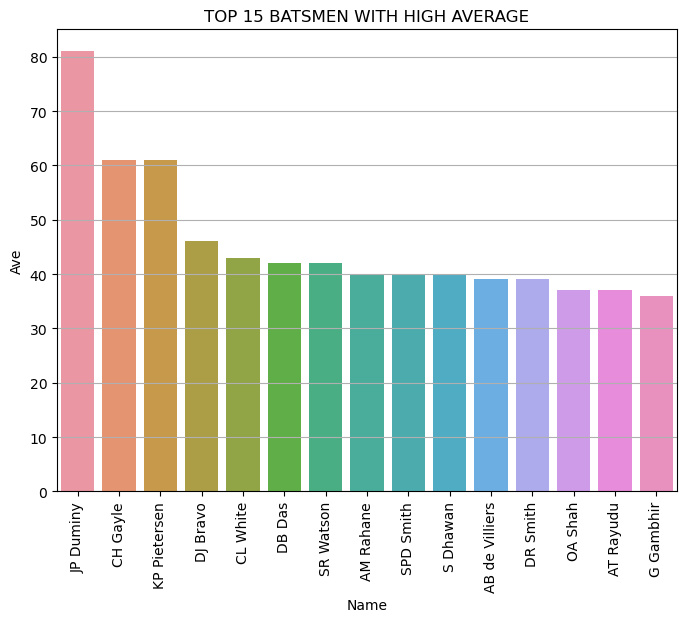

In [251]:
plt.figure(figsize= (8,6))
sns.barplot(x = 'Name',y = 'Ave',data = part4_data2.sort_values(by = 'Ave',ascending = False).head(15))
plt.xticks(rotation = 90)
plt.title('TOP 15 BATSMEN WITH HIGH AVERAGE')
plt.grid(axis = 'y')
plt.show()

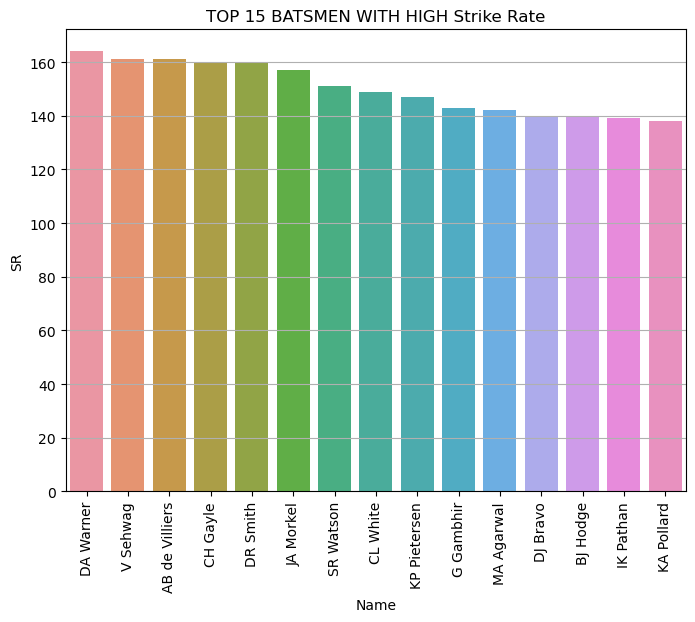

In [252]:
plt.figure(figsize= (8,6))
sns.barplot(x = 'Name',y = 'SR',data = part4_data2.sort_values(by = 'SR',ascending = False).head(15))
plt.xticks(rotation = 90)
plt.title('TOP 15 BATSMEN WITH HIGH Strike Rate')
plt.grid(axis = 'y')
plt.show()

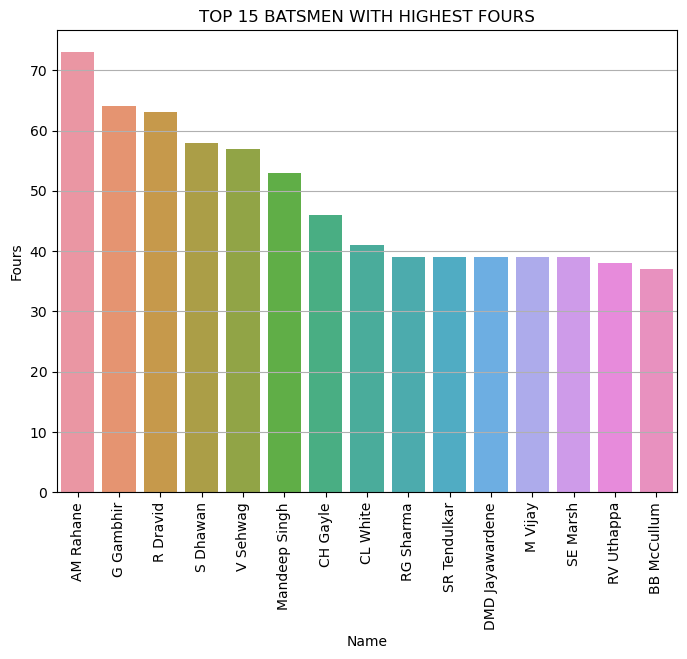

In [253]:
plt.figure(figsize= (8,6))
sns.barplot(x = 'Name',y = 'Fours',data = part4_data2.sort_values(by = 'Fours',ascending = False).head(15))
plt.xticks(rotation = 90)
plt.title('TOP 15 BATSMEN WITH HIGHEST FOURS')
plt.grid(axis = 'y')

plt.show()

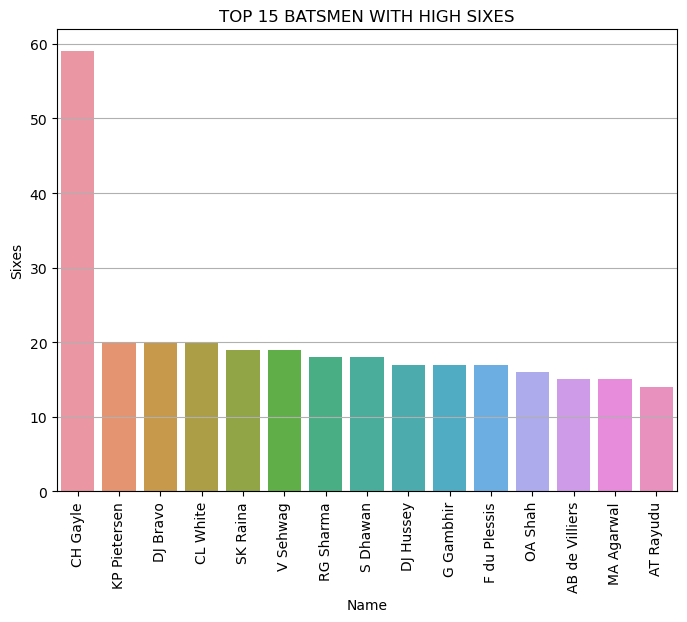

In [254]:
plt.figure(figsize= (8,6))
sns.barplot(x = 'Name',y = 'Sixes',data = part4_data2.sort_values(by = 'Sixes',ascending = False).head(15))
plt.xticks(rotation = 90)
plt.title('TOP 15 BATSMEN WITH HIGH SIXES')
plt.grid(axis = 'y')
plt.show()

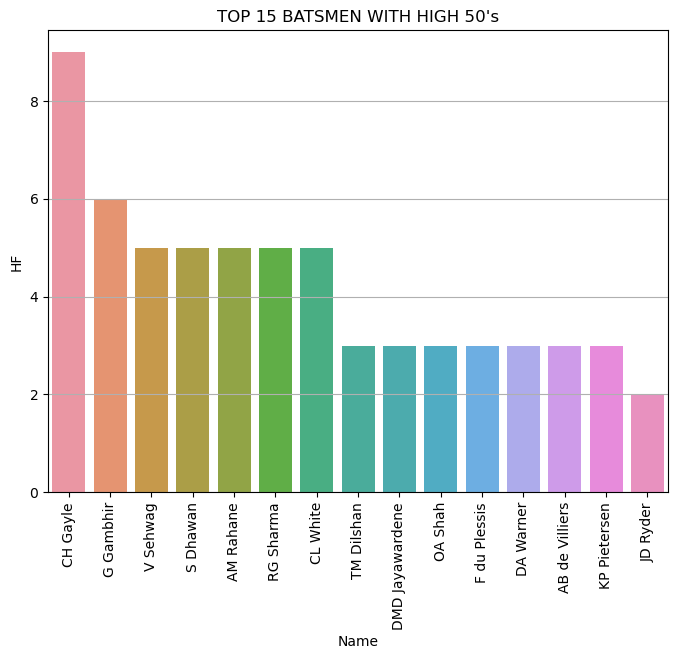

In [255]:
plt.figure(figsize= (8,6))
sns.barplot(x = 'Name',y = 'HF',data = part4_data2.sort_values(by = 'HF',ascending = False).head(15))
plt.xticks(rotation = 90)
plt.title("TOP 15 BATSMEN WITH HIGH 50's")
plt.grid(axis = 'y')

plt.show()

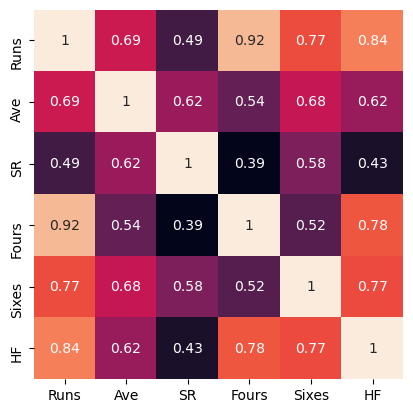

In [256]:
# Lets US SEE THE Correlation BTW the Factors of a batsmen

sns.heatmap(part4_data2.corr(),annot = True,square = True,cbar = False)
plt.show()

# ** NOTE**
1. Fours and Runs have 92% correllation that means person with highest score has high runs
2. Half Centuries and Runs have 84% positive correlation
3. Half Centuries  have 78% , 77% positive correlation with fours and sixes

In [257]:
# Let us see can we divide Players into different clusters
part4_data2.index = part4_data2['Name']
part4_data2 = part4_data2.drop('Name',axis = 1)


In [258]:
part4_data2_scaled = pd.DataFrame(MinMaxScaler().fit_transform(part4_data2),columns = part4_data2.columns,index = part4_data2.index)
part4_data2_scaled.head()

Runs       Ave        SR     Fours     Sixes        HF
Name                                                                 
CH Gayle   1.000000  0.753086  0.972603  0.630137  1.000000  1.000000
G Gambhir  0.804378  0.444444  0.856164  0.876712  0.288136  0.666667
V Sehwag   0.674419  0.407407  0.979452  0.780822  0.322034  0.555556
CL White   0.652531  0.530864  0.897260  0.561644  0.338983  0.555556
S Dhawan   0.775650  0.493827  0.760274  0.794521  0.305085  0.555556

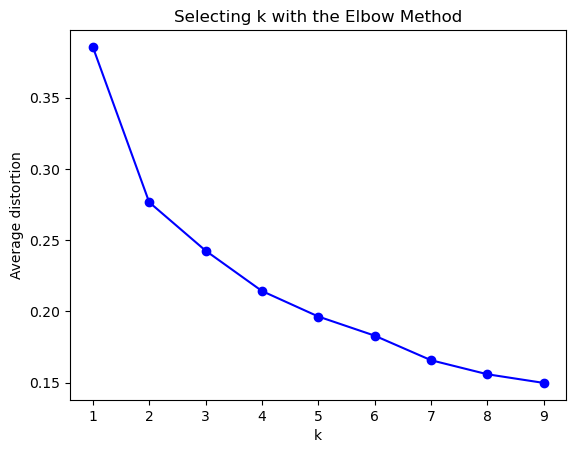

In [259]:
def optimal_k(df):
    clusters=range(1,10)
    meanDistortions=[]

    for k in clusters:
        model=KMeans(n_clusters=k)
        model.fit(df)
        prediction=model.predict(df)
        meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])


    plt.plot(clusters, meanDistortions, 'bo-')#'bo-'
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with the Elbow Method')
    plt.show()
    
optimal_k(part4_data2_scaled)

In [260]:
#building Kmeans model with two clustrs
model=KMeans(n_clusters=2)
model.fit(part4_data2_scaled)

part4_data2_scaled['Labels'] = model.labels_
part4_data2['Labels'] = model.labels_

In [261]:
part4_data2

Runs  Ave   SR  Fours  Sixes  HF  Labels
Name                                                 
CH Gayle      733   61  160     46     59   9       1
G Gambhir     590   36  143     64     17   6       1
V Sehwag      495   33  161     57     19   5       1
CL White      479   43  149     41     20   5       1
S Dhawan      569   40  129     58     18   5       1
...           ...  ...  ...    ...    ...  ..     ...
Z Khan         12    6   70      1      0   0       0
WD Parnell     19    4   70      2      0   0       0
PC Valthaty    30    5   58      4      0   0       0
RP Singh        6    3   50      0      0   0       0
R Sharma        2    0   18      0      0   0       0

[90 rows x 7 columns]

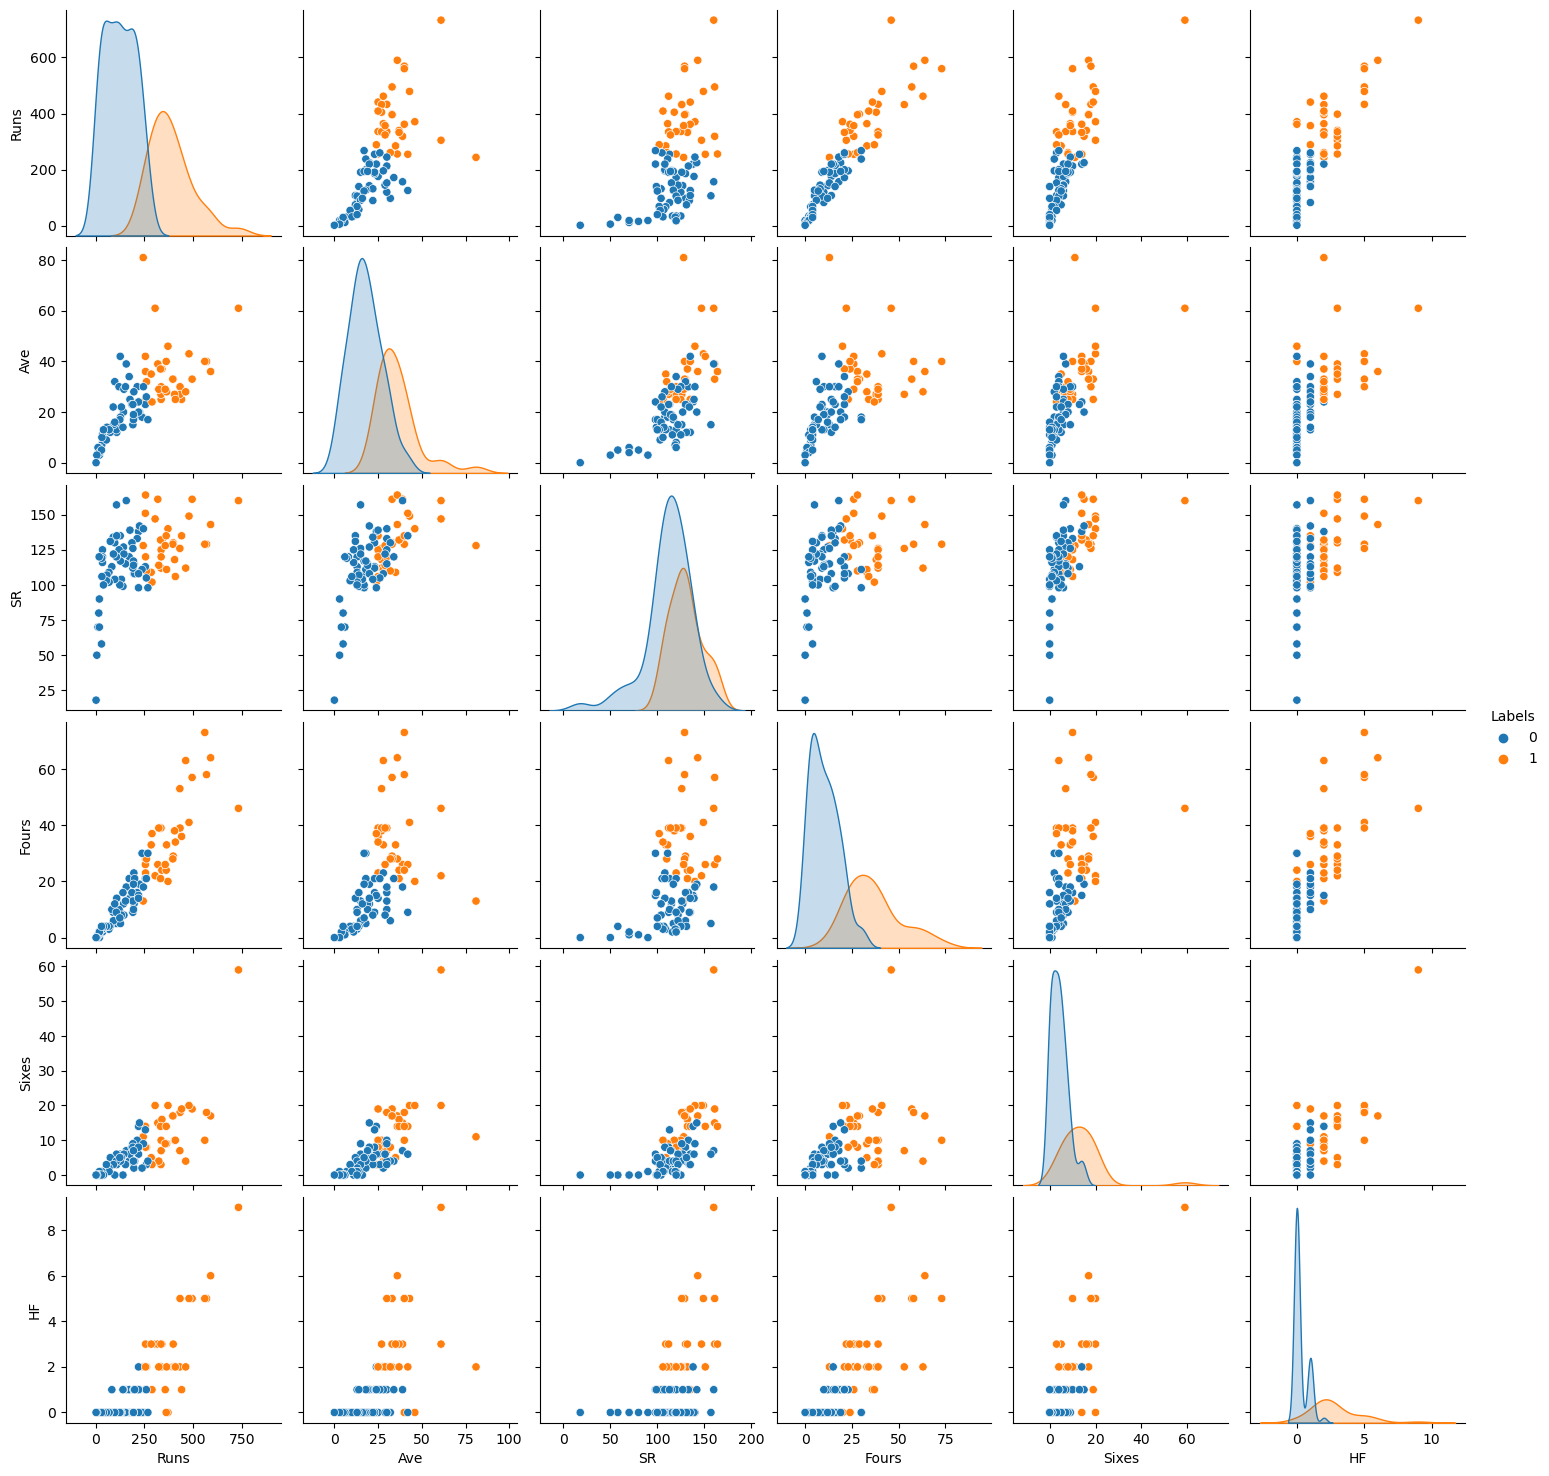

In [262]:
sns.pairplot(part4_data2,hue = 'Labels')
plt.show()

In [263]:
#lets see avg vlaues of each cluster

part4_data2.groupby('Labels')[part4_data2.columns[:-1]].mean()

Runs        Ave          SR      Fours      Sixes        HF
Labels                                                                   
0       123.929825  17.631579  112.070175  10.210526   4.087719  0.263158
1       385.757576  35.878788  130.121212  36.333333  13.606061  2.787879

In [269]:
#frequency 
part4_data2.groupby('Labels')['Labels'].count()

Labels
0    57
1    33
Name: Labels, dtype: int64

# ** NOTE **
1. Players in cluster 0 are top batsmens with higher runs,avg , 4's,6's..etc
2. Players in clusters are rank 2 playes or in other terms we can say them as lower order batsmens or allrounders
3. Cluster 1 has 57 players where cluster 2 has 33 players

# <font color= 'purple'>END OF PART 4 </font>

# <font color= 'green'>PART 5 </font>

<b>1.List down all possible dimensionality reduction techniques that can be implemented using python.</b>

<b>Linear Algebra Methods</b><br>
Matrix factorization methods drawn from the field of linear algebra can be used for dimensionality.

Principal Components Analysis<br>
Singular Value Decomposition<br>
Non-Negative Matrix Factorization<br>

<b>Manifold Learning Methods</b><br>
Manifold learning methods seek a lower-dimensional projection of high dimensional input that captures the salient properties of the input data.

Some of the more popular methods include:

Isomap Embedding<br>
Locally Linear Embedding<br>
Multidimensional Scaling<br>
Spectral Embedding<br>
t-distributed Stochastic Neighbor Embedding

Each algorithm offers a different approach to the challenge of discovering natural relationships in data at lower dimensions.

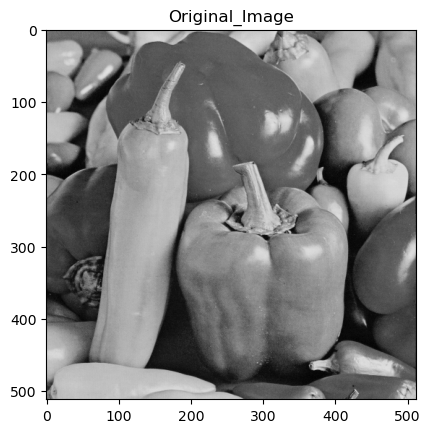

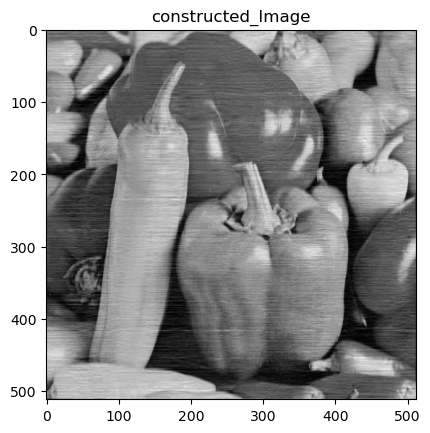

In [264]:
#2.So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data 
#[images and video] and text data ? Please illustrate your findings using a simple implementation on python.

# Image Compression and Reconstruction by PCA

import cv2

# Load the image
imgpath = "D:/Datasets/Unsupervised_learning_project_pdp/4.2.07.tiff"
img = cv2.imread(imgpath, 0)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original_Image')
plt.show()

# Calculating the mean columnwise
M = np.mean(img.T, axis=1)

# Sustracting the mean columnwise
C = img - M

# Calculating the covariance matrix
V = np.cov(C.T)

# Computing the eigenvalues and eigenvectors of covarince matrix
values, vectors = np.linalg.eig(V)

p = np.size(vectors, axis =1)

# Sorting the eigen values in ascending order
idx = np.argsort(values)
idx = idx[::-1]

# Sorting eigen vectors
vectors = vectors[:,idx]
values = values[idx]

# PCs used for reconstruction (can be varied)
num_PC = 200

# Cutting the PCs
if num_PC <p or num_PC >0:
    vectors = vectors[:, range(num_PC)]

# Reconstructing the image with PCs
score = np.dot(vectors.T, C)
constructed_img = np.dot(vectors, score) + M
constructed_img = np.uint8(np.absolute(constructed_img))
plt.title('constructed_Image')

# Show reconstructed image
plt.imshow(cv2.cvtColor(constructed_img,cv2.COLOR_RGB2BGR))
plt.show()
#cv2.imshow("Reconstructed Image", constructed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# <font color= 'purple'>END OF PART 5 </font>